# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [259]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 



## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [101]:
import pandas as pd
# Importing the file porter_data_1.csv
porter_df = pd.read_csv(r'porter_data_1.csv',low_memory=False)
porter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [103]:
import seaborn as sns
#Removing display limit of dataframe
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Setting style for seabonrn
sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

In [105]:
porter_df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [107]:
#Basic information about the data
## Number of rows and columns
print('Number of Columns:',porter_df.shape[1])
print('Number of Rows:',porter_df.shape[0])
## Number of missing values
print('Number of missing values:',porter_df.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',porter_df.nunique().sum())
## Number of duplicates
print('Number of duplicates:',porter_df.duplicated().sum())

Number of Columns: 14
Number of Rows: 175777
Number of missing values: 0
Number of unique values: 338100
Number of duplicates: 0


In [109]:
# Data types of each column
print(porter_df.dtypes)

market_id                   float64
created_at                   object
actual_delivery_time         object
store_primary_category        int64
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_dashers       float64
total_busy_dashers          float64
total_outstanding_orders    float64
distance                    float64
dtype: object


In [111]:
print(porter_df.describe())

           market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924    

In [113]:
## Checking for missing values
print(porter_df.isnull().sum())
# Shape of the dataframe

print(porter_df.shape)

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64
(175777, 14)


## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [115]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
porter_df['created_at'] = porter_df['created_at'].astype('datetime64[ns]')
porter_df['actual_delivery_time'] = porter_df['actual_delivery_time'].astype('datetime64[ns]')

In [117]:
# Verify the data type of the columns
porter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [119]:
# Convert categorical features to category type
category_columns = ['market_id', 'store_primary_category', 'order_protocol']
porter_df['market_id'] = porter_df['market_id'].astype('int64')
porter_df['order_protocol'] = porter_df['order_protocol'].astype('int64')


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [121]:
# Calculate time taken in minutes
# Calculate time taken in minutes
porter_df['time_taken'] = (porter_df['actual_delivery_time'] - porter_df['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [123]:
# Extract the hour and day of week from the 'created_at' timestamp
# Extract the hour and day of week from the 'created_at' timestamp
porter_df['hour'] = porter_df['created_at'].dt.hour.astype('int64')
porter_df['day_of_week'] = porter_df['created_at'].dt.day_of_week.astype('int64')


# Create a categorical feature 'isWeekend'
porter_df['isWeekend'] = porter_df['day_of_week'].apply(lambda x: 0 if x < 5 else 1 )



In [125]:
# Drop unnecessary columns
porter_df.drop(['actual_delivery_time', 'created_at'], axis=1, inplace=True)

In [127]:
# Verify all the changes
porter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  int64  
 1   store_primary_category    175777 non-null  int64  
 2   order_protocol            175777 non-null  int64  
 3   total_items               175777 non-null  int64  
 4   subtotal                  175777 non-null  int64  
 5   num_distinct_items        175777 non-null  int64  
 6   min_item_price            175777 non-null  int64  
 7   max_item_price            175777 non-null  int64  
 8   total_onshift_dashers     175777 non-null  float64
 9   total_busy_dashers        175777 non-null  float64
 10  total_outstanding_orders  175777 non-null  float64
 11  distance                  175777 non-null  float64
 12  time_taken                175777 non-null  float64
 13  hour                      175777 non-null  i

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

In [129]:
# Create copy of actual dataframe this will be used for further analysis. Keeping deep copy helps to avoid any changes in original dataframe
input_data = porter_df.copy(deep=True)

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [131]:
# Define target variable (y) and features (X)

X = input_data[['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders','distance', 'hour', 'day_of_week', 'isWeekend']]
y = input_data['time_taken']


In [133]:
print(X.shape)
print(y.shape)

(175777, 15)
(175777,)


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [137]:
# Import libs 
from sklearn.model_selection import train_test_split

In [138]:
# Split data into training and testing sets
np.random.seed(0)
input_df_train, input_df_test = train_test_split(porter_df, train_size = 0.8, test_size = 0.2, random_state = 100)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [141]:
# Define numerical and categorical columns for easy EDA and data manipulation

# Numerical columns 
num_columns = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'time_taken', 'hour']

print("Numerical columns",num_columns)

Numerical columns ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'time_taken', 'hour']


In [143]:
cat_columns = ['market_id', 'store_primary_category', 'order_protocol', 'day_of_week', 'isWeekend']
print("Categorical columns",cat_columns)

Categorical columns ['market_id', 'store_primary_category', 'order_protocol', 'day_of_week', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

<Figure size 2000x2000 with 0 Axes>

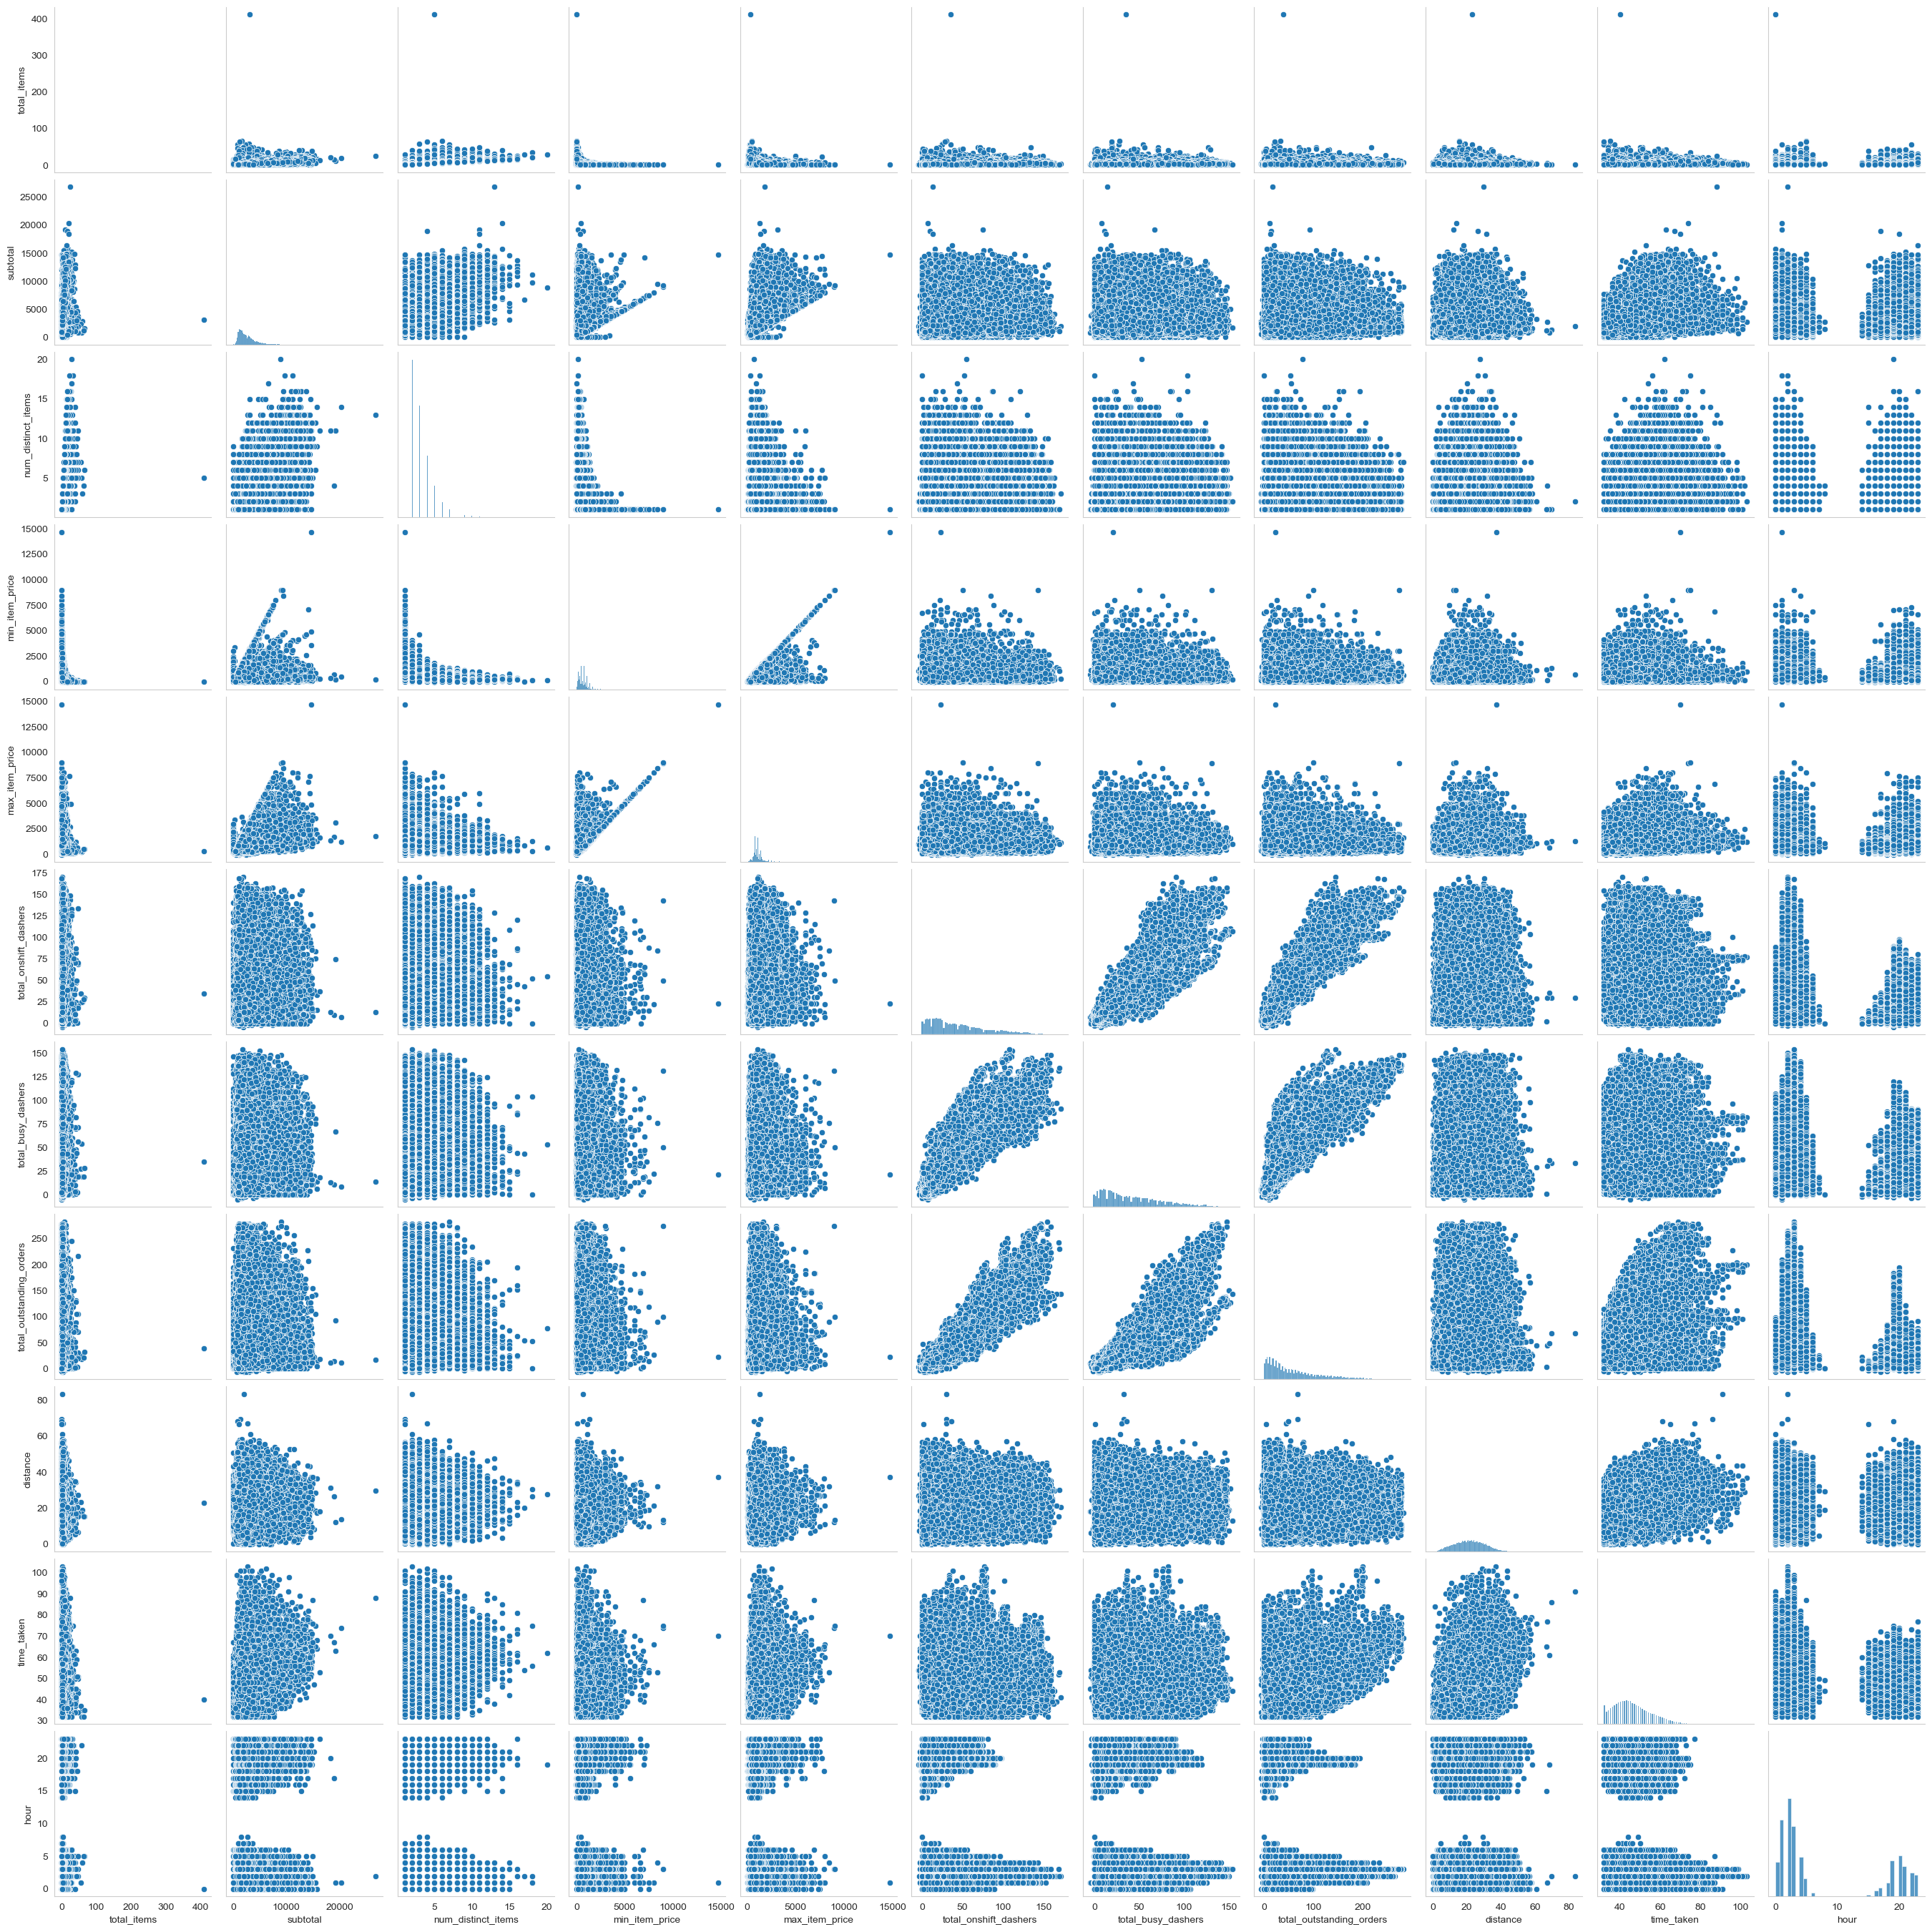

In [146]:
# Plot distributions for all numerical columns

plt.figure(figsize = (20, 20))
sns.pairplot(input_df_train[num_columns])
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

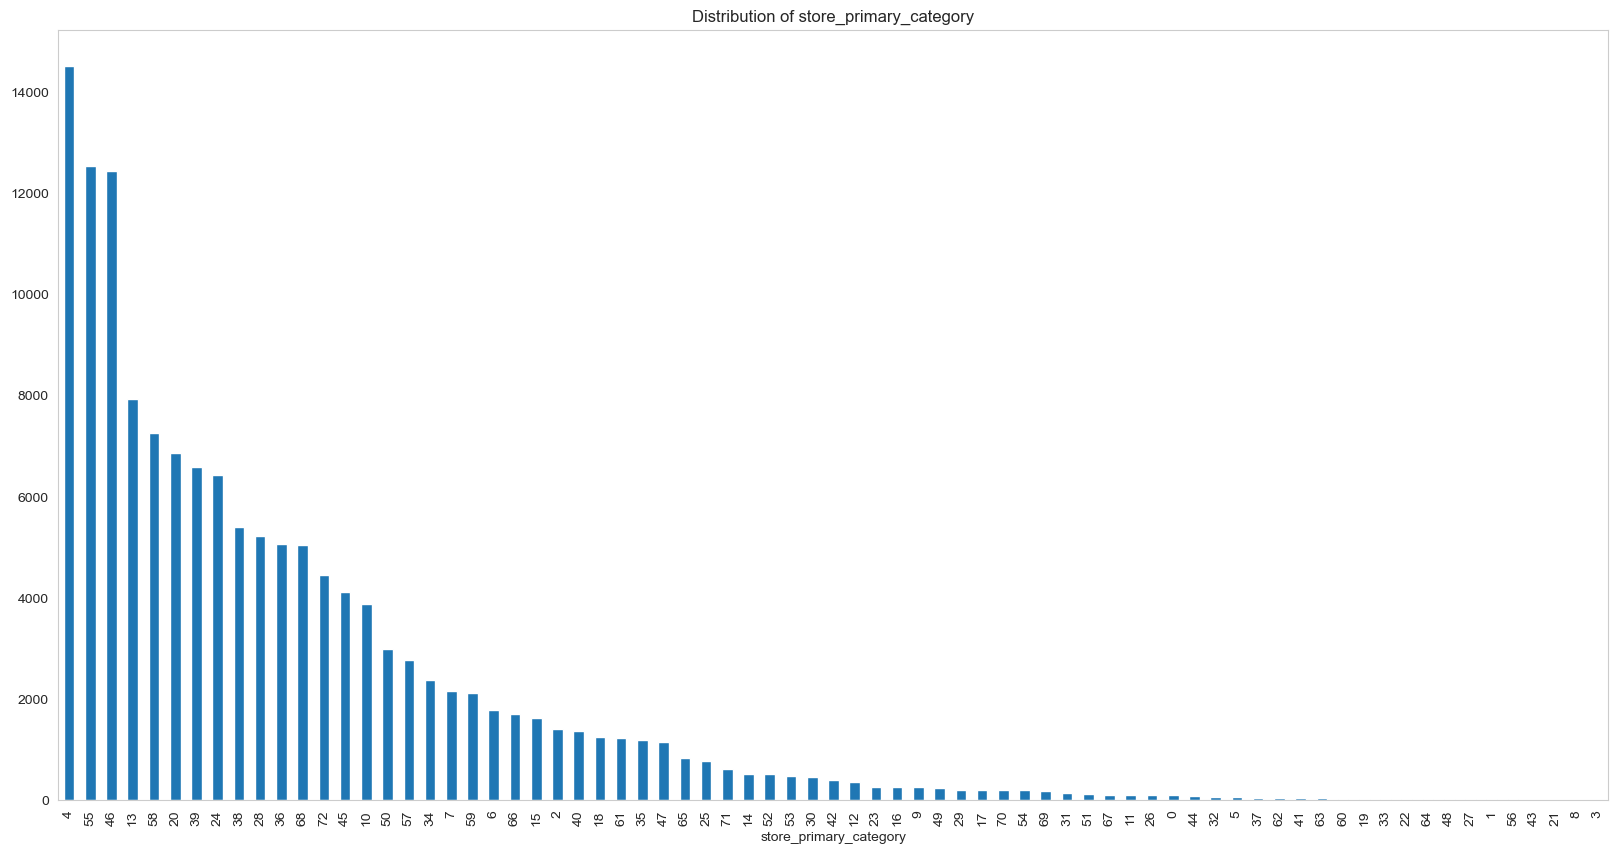

In [147]:
# Distribution of categorical columns
# Distribution of store_primary_category
input_df_train['store_primary_category'].value_counts().plot(kind = 'bar', figsize = (20, 10))
plt.title('Distribution of store_primary_category')
plt.show()


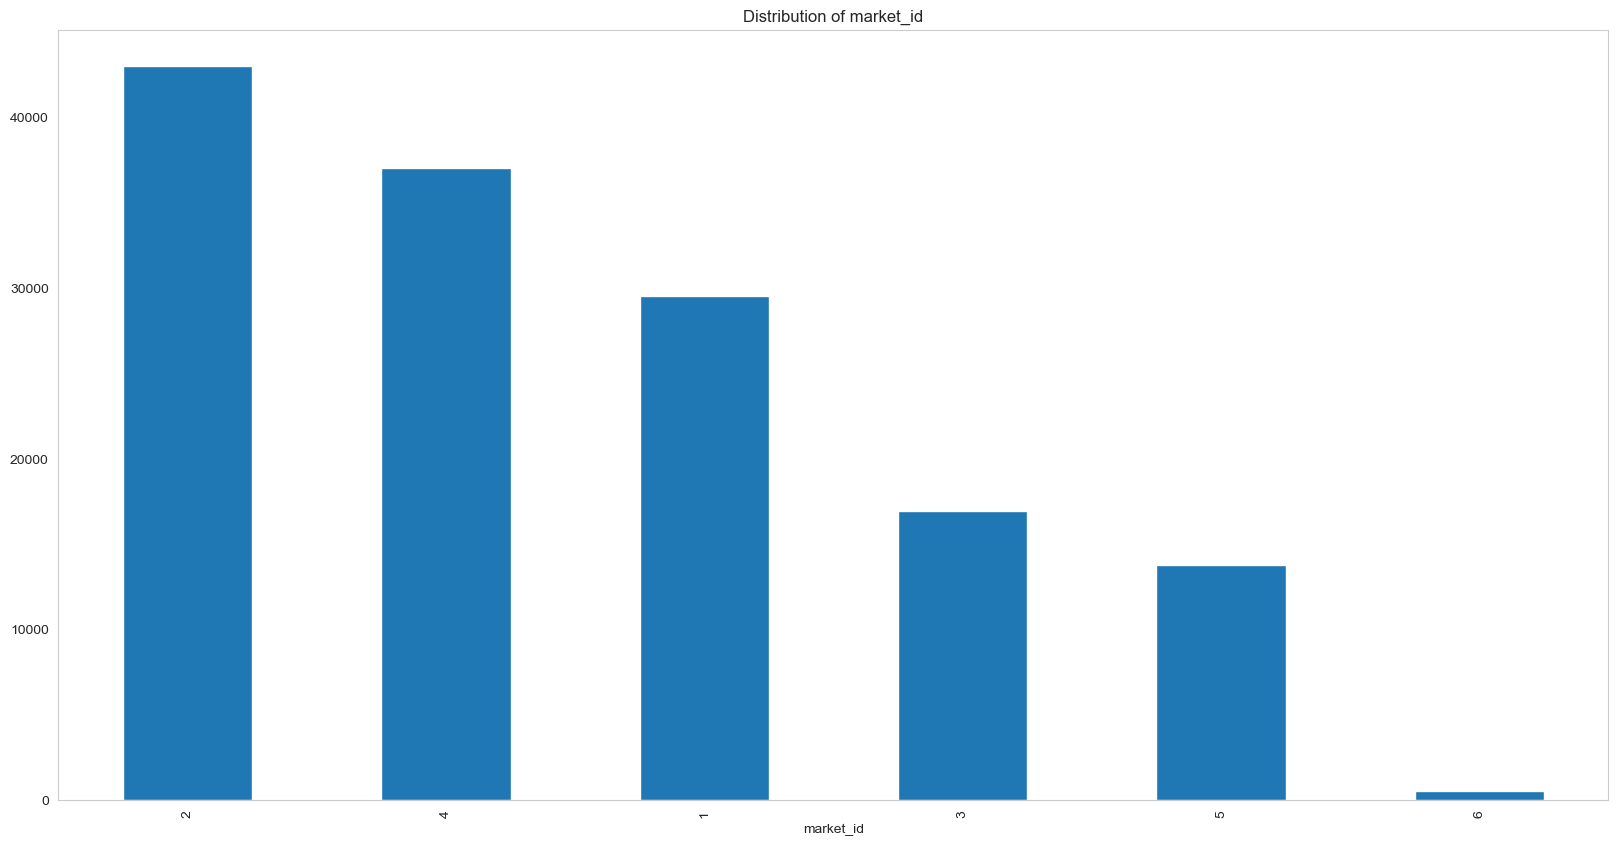

In [150]:
# Distribution of market_id
input_df_train['market_id'].value_counts().plot(kind = 'bar', figsize = (20, 10))
plt.title('Distribution of market_id')
plt.show()

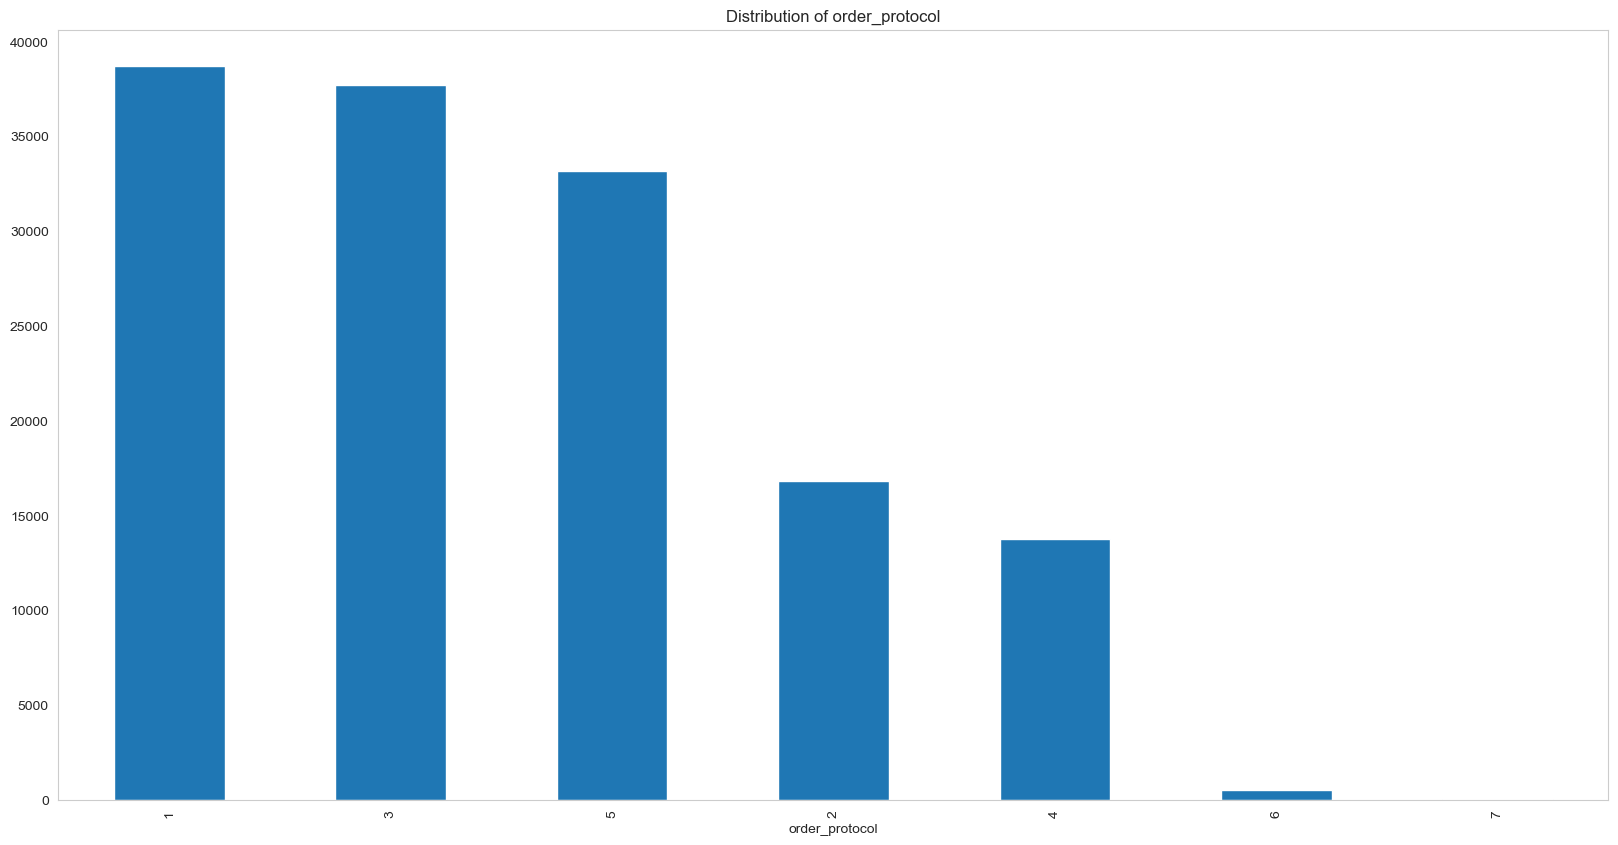

In [152]:
# Distribution of order_protocol
input_df_train['order_protocol'].value_counts().plot(kind = 'bar', figsize = (20, 10))
plt.title('Distribution of order_protocol')
plt.show()

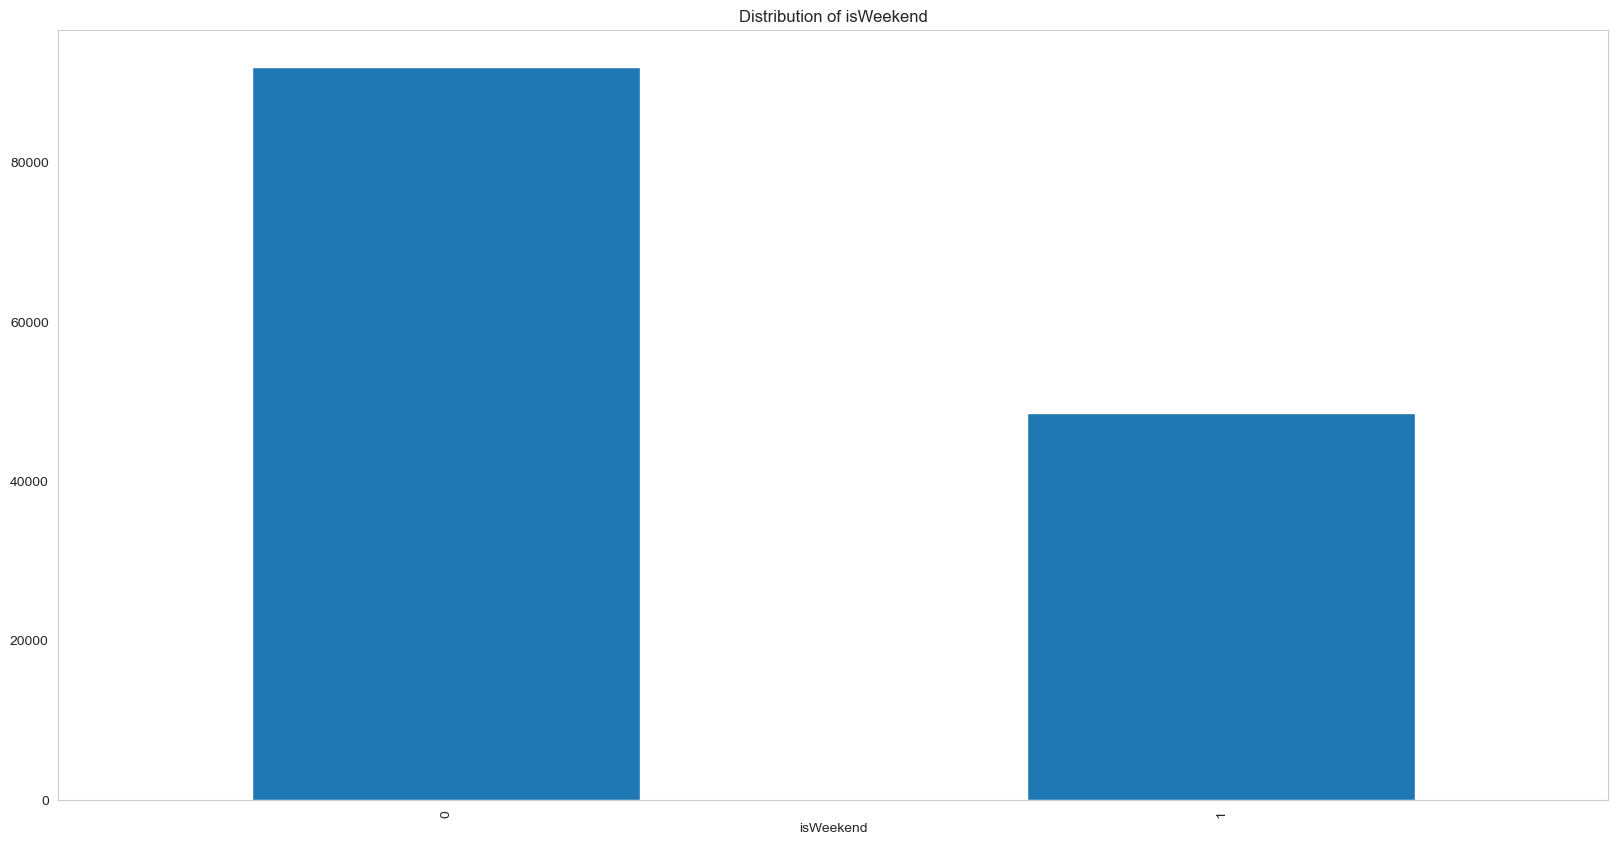

In [154]:
# Distribution of isWeekend
input_df_train['isWeekend'].value_counts().plot(kind = 'bar', figsize = (20, 10))
plt.title('Distribution of isWeekend')
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

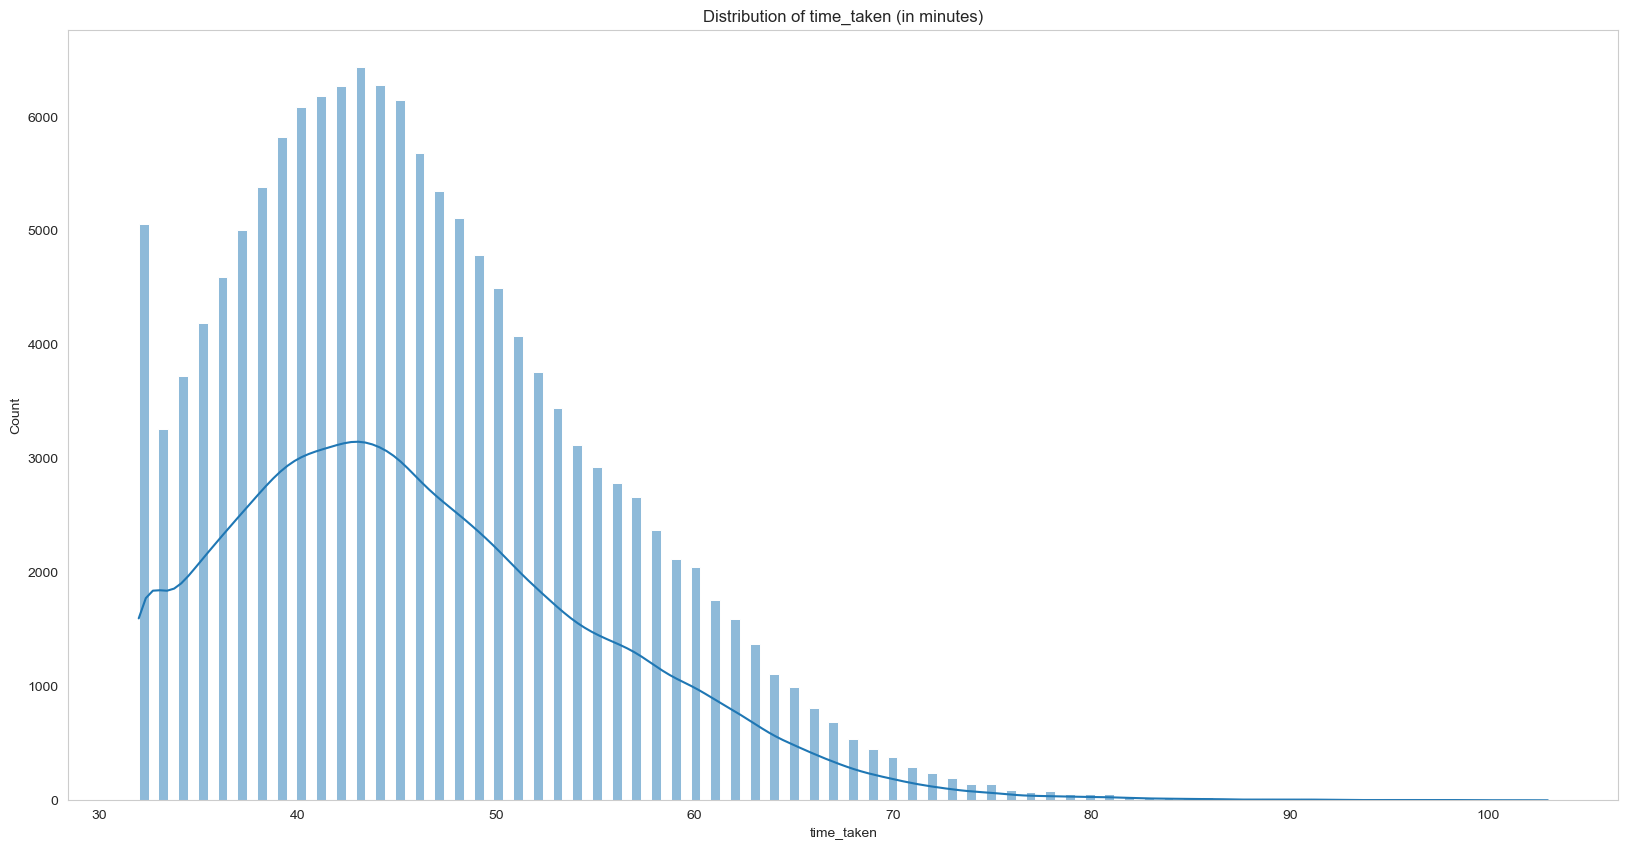

In [156]:
# Distribution of time_taken

plt.figure(figsize=(20, 10))
sns.histplot(input_df_train['time_taken'], kde=True)
plt.title('Distribution of time_taken (in minutes)')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

<Figure size 5000x30000 with 0 Axes>

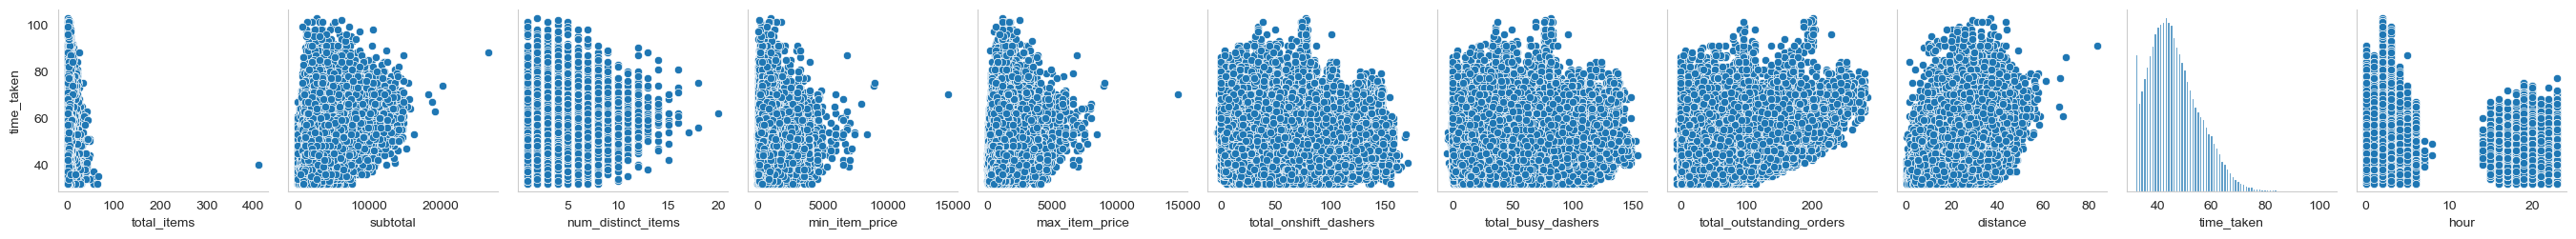

In [158]:
# Scatter plot to visualise the relationship between time_taken and other features
# Scatter plot between time_taken numerical columns

plt.figure(figsize=(50, 300))
sns.pairplot(data=input_df_train , y_vars='time_taken', x_vars=num_columns, kind='scatter')
plt.show()

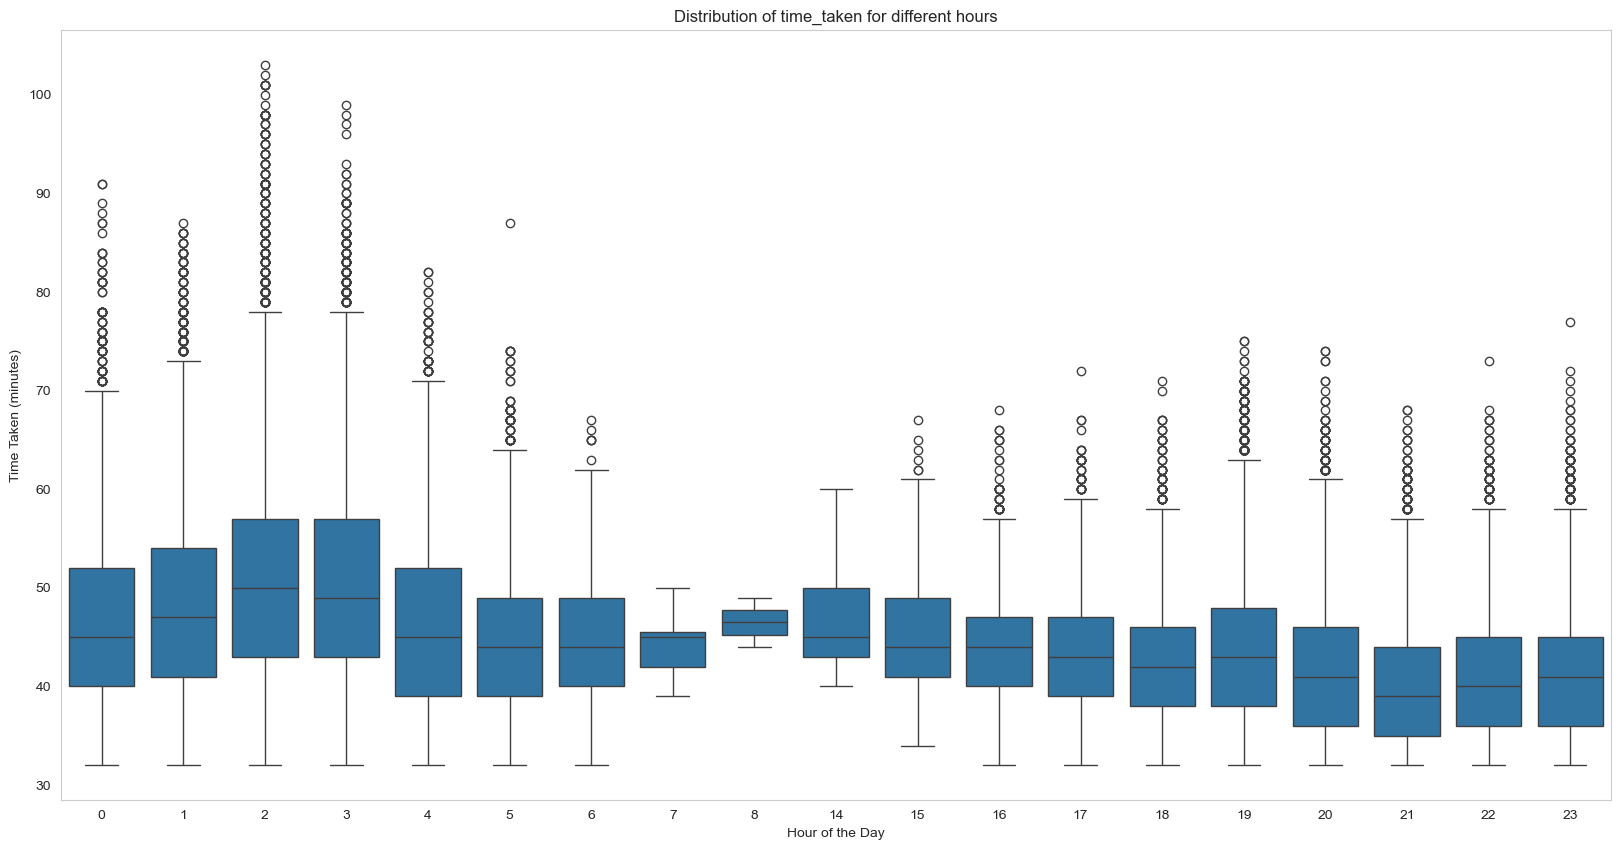

In [160]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(20, 10))
sns.boxplot(x='hour', y='time_taken', data=input_df_train)
plt.title('Distribution of time_taken for different hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Time Taken (minutes)')
plt.show()



#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

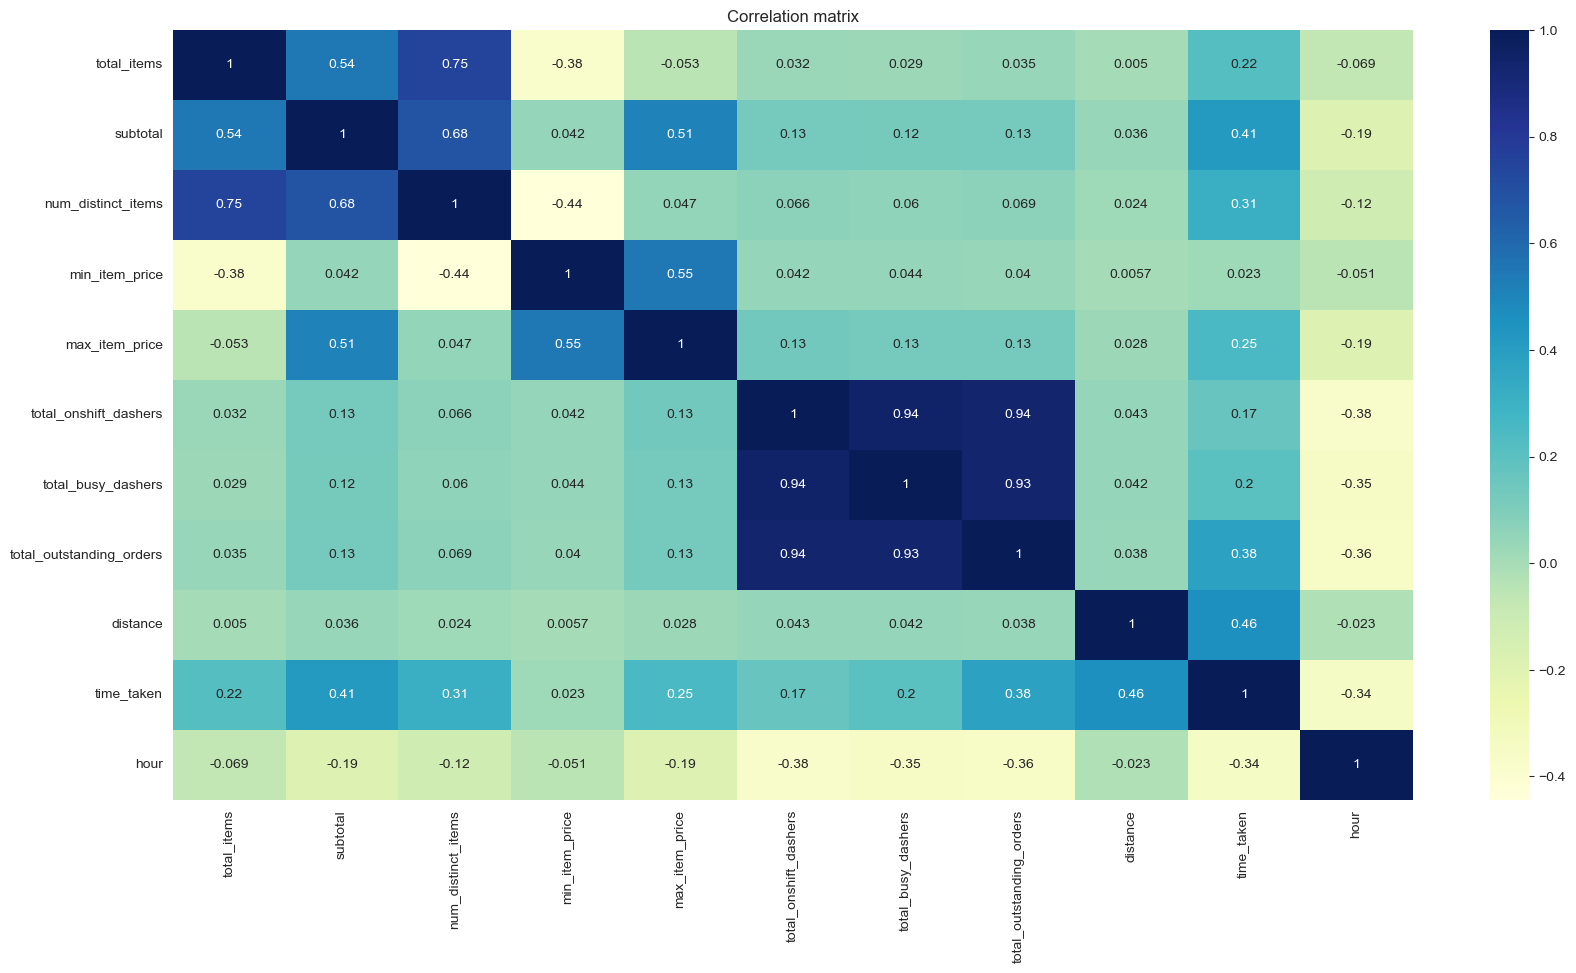

In [162]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize=(20, 10))
sns.heatmap(input_df_train[num_columns].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation matrix')
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [164]:
# Drop 3-5 weakly correlated columns from training dataset
weakly_correlated_columns = ['min_item_price', 'total_onshift_dashers','total_busy_dashers']
input_df_train.drop(weakly_correlated_columns, axis=1, inplace=True)

In [166]:
# Update the num_columns list
num_columns = [col for col in num_columns if col not in weakly_correlated_columns]

In [168]:
num_columns

['total_items',
 'subtotal',
 'num_distinct_items',
 'max_item_price',
 'total_outstanding_orders',
 'distance',
 'time_taken',
 'hour']

In [170]:
input_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 42111 to 38408
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 140621 non-null  int64  
 1   store_primary_category    140621 non-null  int64  
 2   order_protocol            140621 non-null  int64  
 3   total_items               140621 non-null  int64  
 4   subtotal                  140621 non-null  int64  
 5   num_distinct_items        140621 non-null  int64  
 6   max_item_price            140621 non-null  int64  
 7   total_outstanding_orders  140621 non-null  float64
 8   distance                  140621 non-null  float64
 9   time_taken                140621 non-null  float64
 10  hour                      140621 non-null  int64  
 11  day_of_week               140621 non-null  int64  
 12  isWeekend                 140621 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 15.0 MB

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

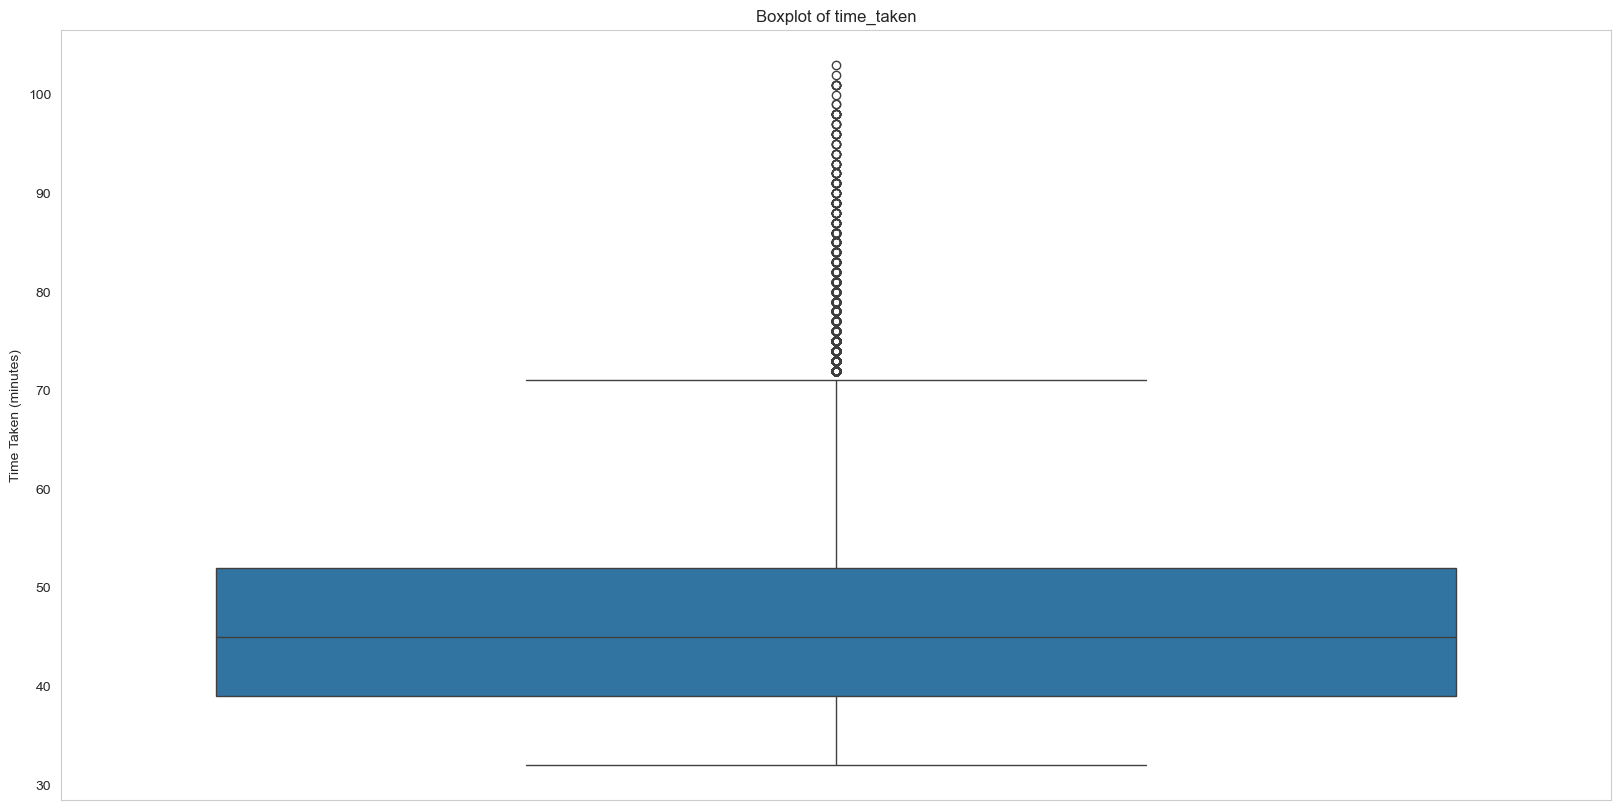

In [172]:
# Boxplot for time_taken
plt.figure(figsize=(20, 10))
sns.boxplot(y='time_taken', data=input_df_train)
plt.title('Boxplot of time_taken')
plt.ylabel('Time Taken (minutes)')
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [174]:
# Handle outliers

# Define a function to remove outliers using the IQR method
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from all numerical columns
numerical_columns = ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 
                     'total_outstanding_orders', 'distance', 'time_taken', 'hour']
input_df_train = remove_outliers(input_df_train, numerical_columns)

# Verify the changes
input_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119075 entries, 42111 to 38408
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 119075 non-null  int64  
 1   store_primary_category    119075 non-null  int64  
 2   order_protocol            119075 non-null  int64  
 3   total_items               119075 non-null  int64  
 4   subtotal                  119075 non-null  int64  
 5   num_distinct_items        119075 non-null  int64  
 6   max_item_price            119075 non-null  int64  
 7   total_outstanding_orders  119075 non-null  float64
 8   distance                  119075 non-null  float64
 9   time_taken                119075 non-null  float64
 10  hour                      119075 non-null  int64  
 11  day_of_week               119075 non-null  int64  
 12  isWeekend                 119075 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 12.7 MB

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [176]:
# Define numerical and categorical columns for easy EDA and data manipulation

# Numerical columns 
print("Numerical columns ",num_columns)
# Categorical columns 
print("Catetorical cols",cat_columns)


Numerical columns  ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'distance', 'time_taken', 'hour']
Catetorical cols ['market_id', 'store_primary_category', 'order_protocol', 'day_of_week', 'isWeekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

<Figure size 2000x2000 with 0 Axes>

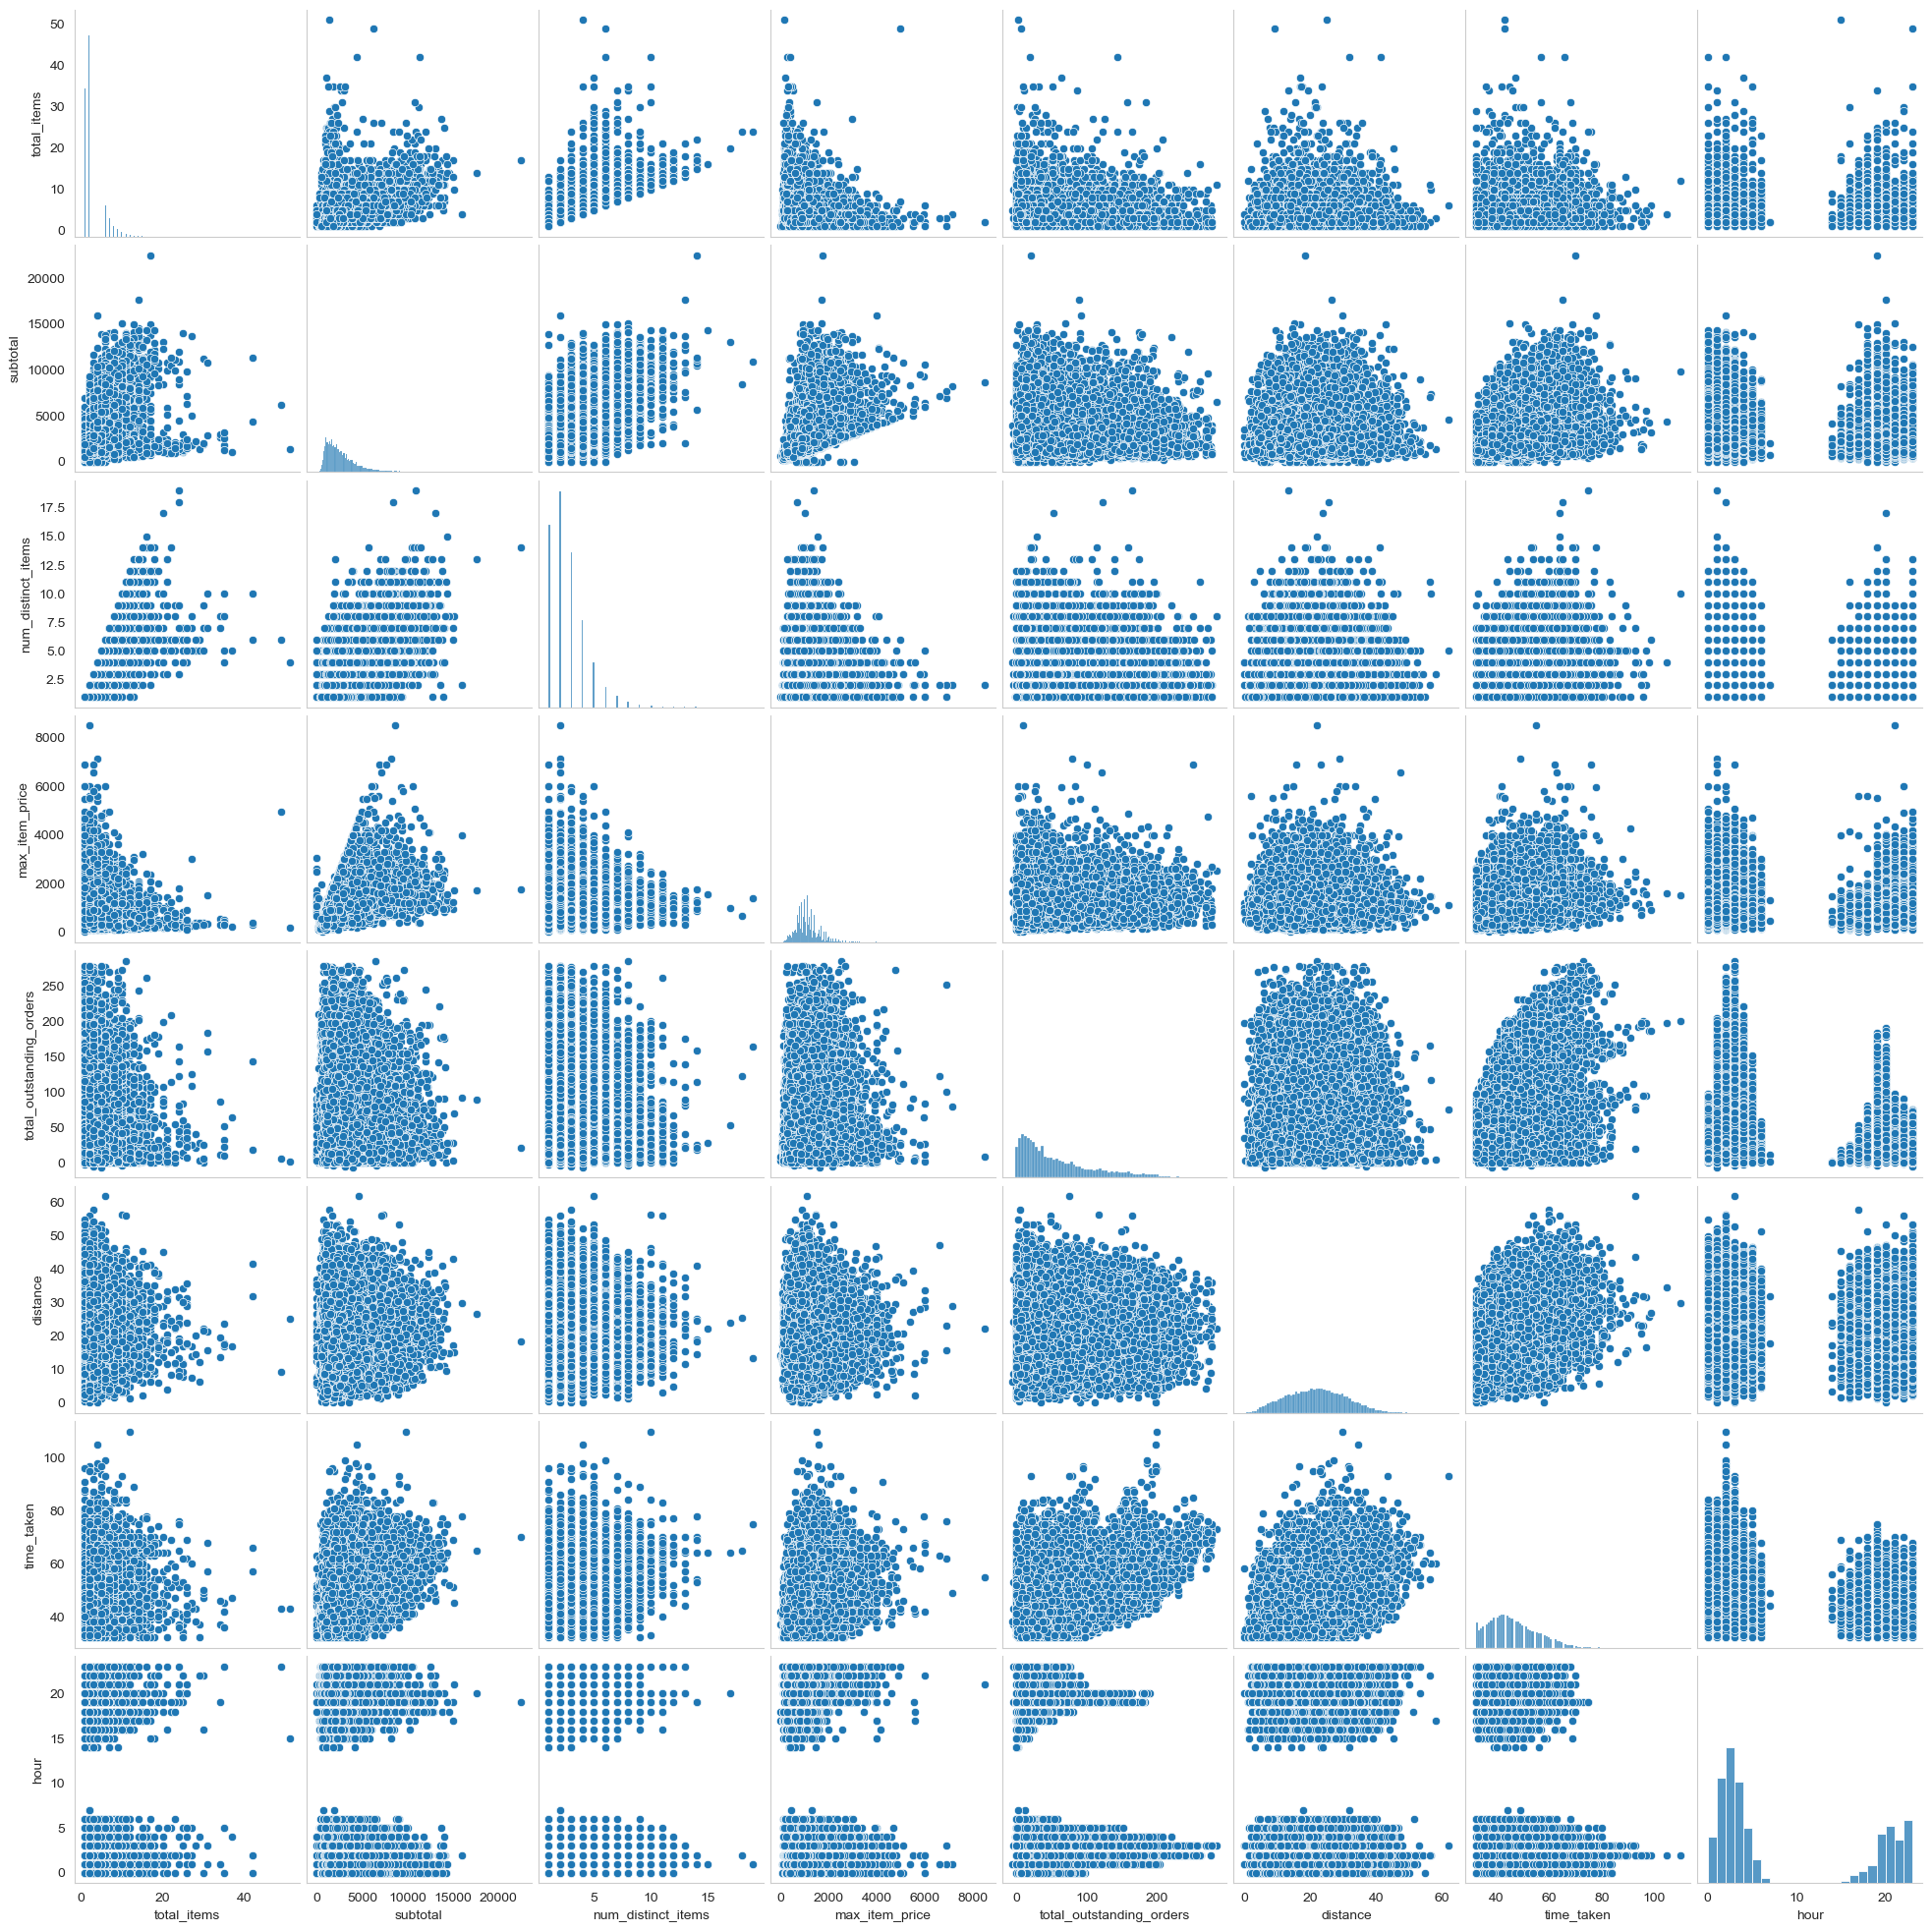

In [178]:
# Plot distributions for all numerical columns

plt.figure(figsize = (20, 20))
sns.pairplot(input_df_test[num_columns])
plt.show()



##### **4.1.2**
Check the distribution of categorical features

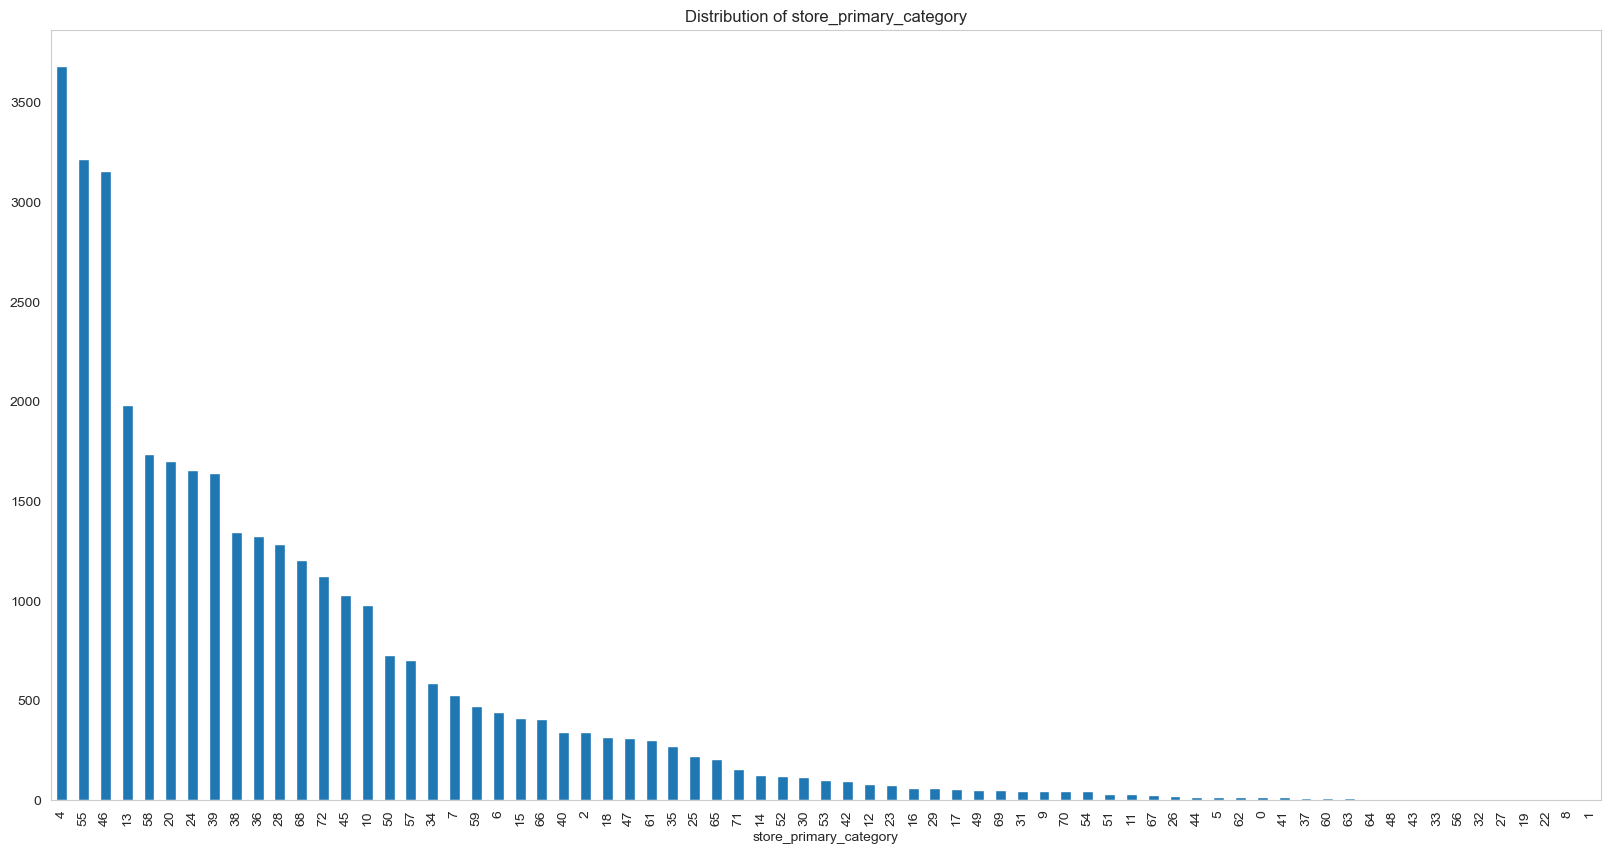

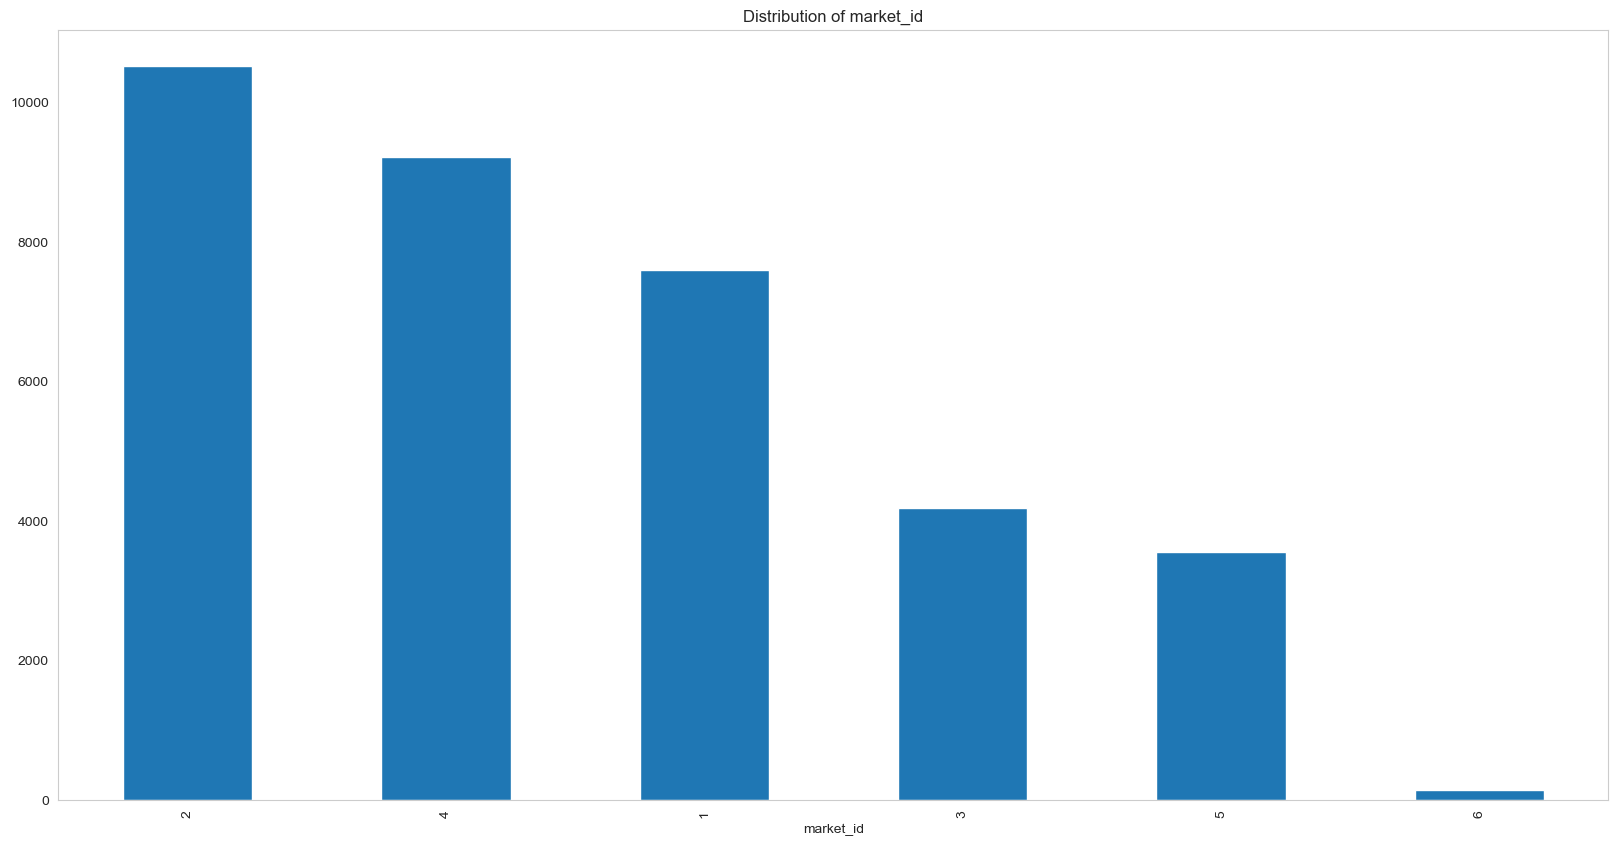

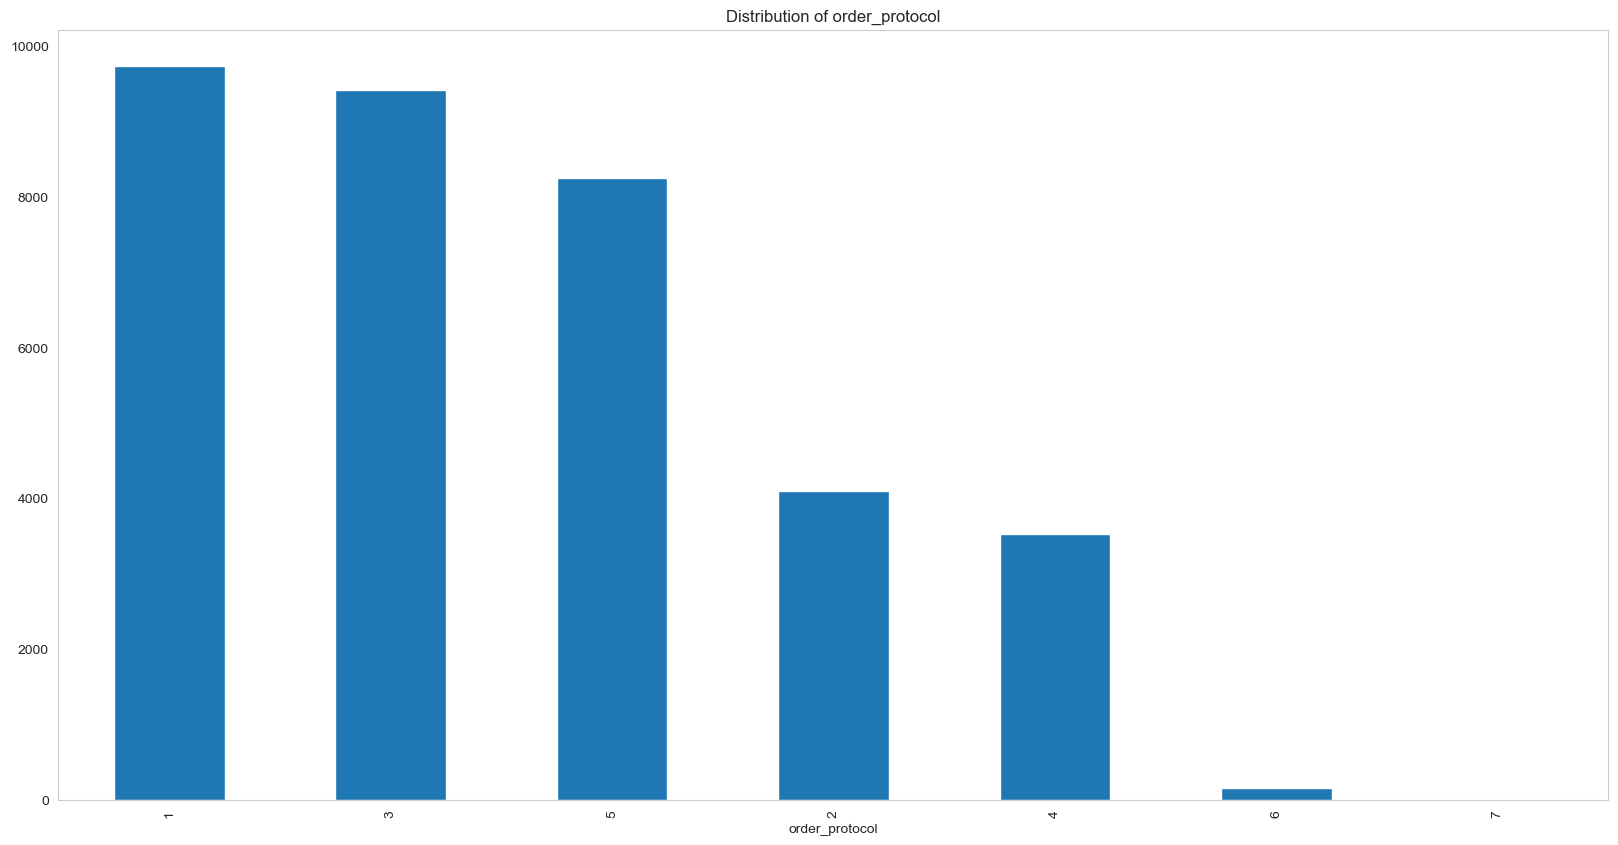

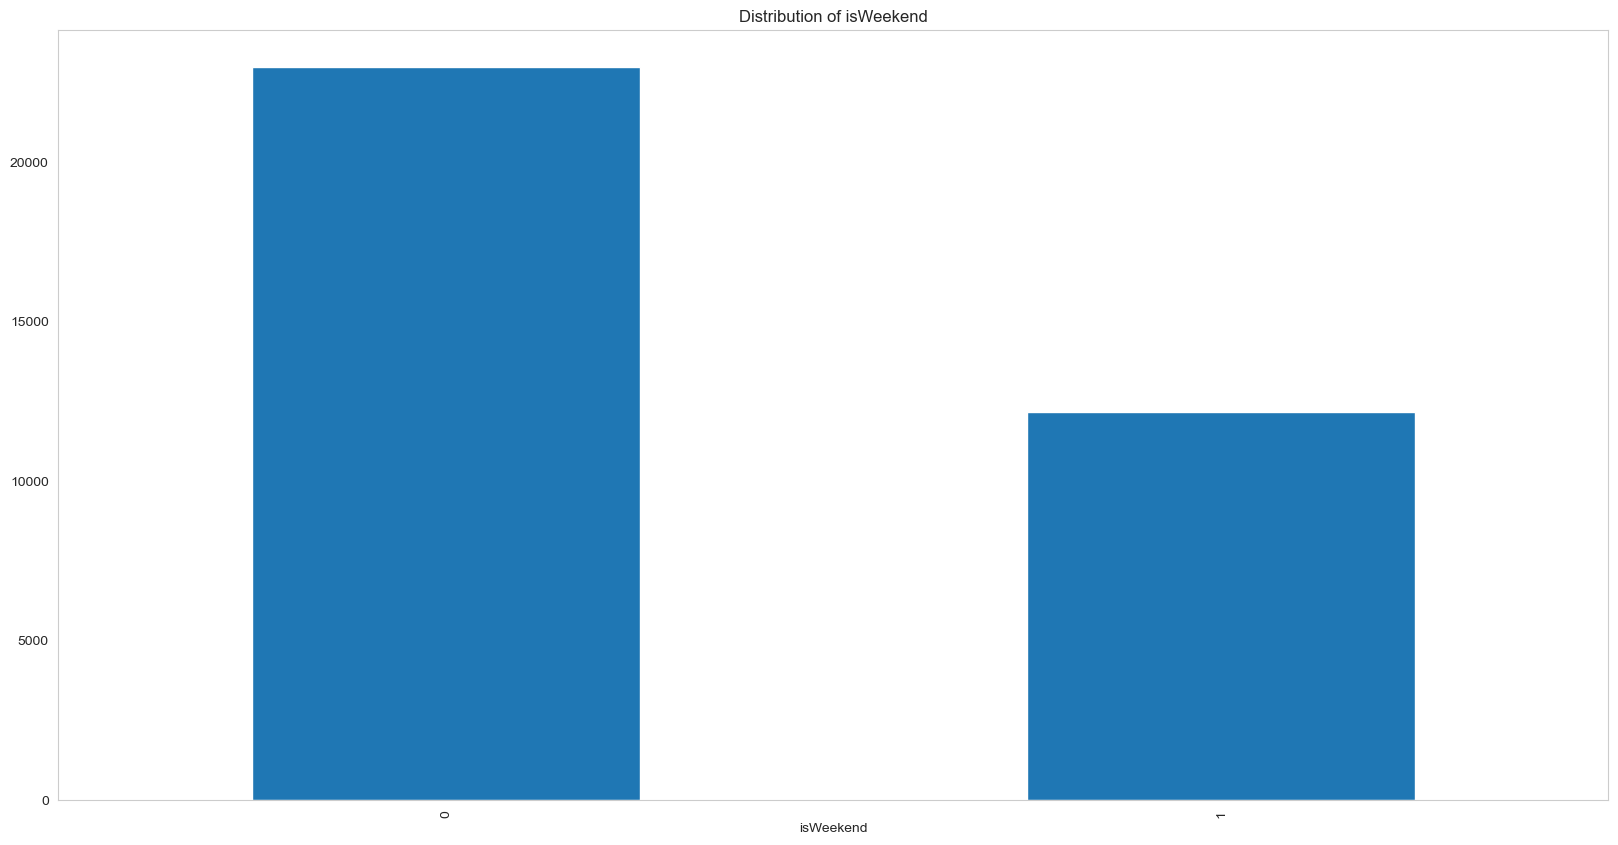

In [180]:
# Distribution of categorical columns
# Distribution of store_primary_category
input_df_test['store_primary_category'].value_counts().plot(kind = 'bar', figsize = (20, 10))
plt.title('Distribution of store_primary_category')
plt.show()

# Distribution of market_id
input_df_test['market_id'].value_counts().plot(kind = 'bar', figsize = (20, 10))
plt.title('Distribution of market_id')
plt.show()

# Distribution of order_protocol
input_df_test['order_protocol'].value_counts().plot(kind = 'bar', figsize = (20, 10))
plt.title('Distribution of order_protocol')
plt.show()

# Distribution of isWeekend
input_df_test['isWeekend'].value_counts().plot(kind = 'bar', figsize = (20, 10))
plt.title('Distribution of isWeekend')
plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

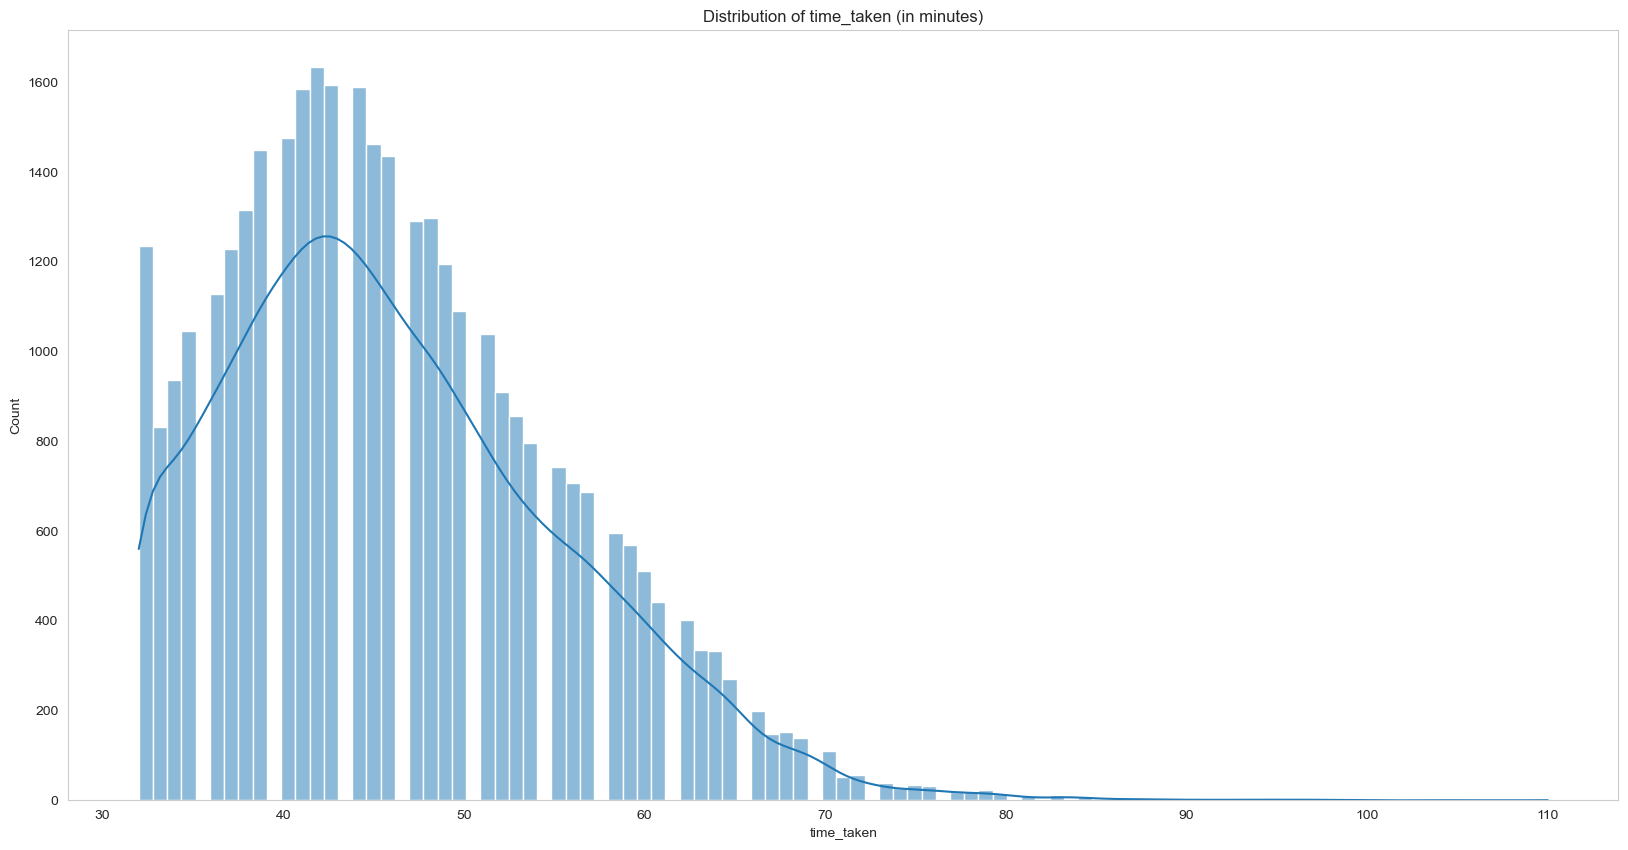

In [182]:
# Distribution of time_taken

plt.figure(figsize=(20, 10))
sns.histplot(input_df_test['time_taken'], kde=True)
plt.title('Distribution of time_taken (in minutes)')
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

<Figure size 5000x30000 with 0 Axes>

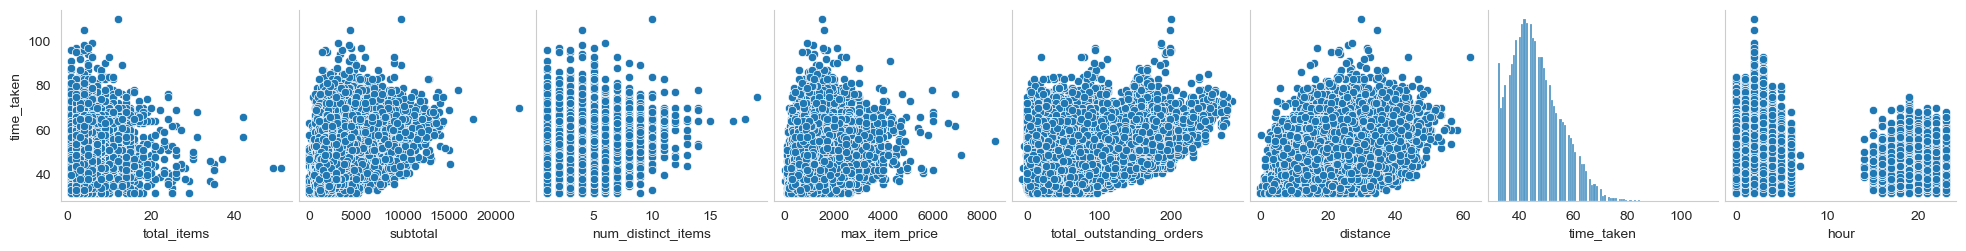

In [184]:
# Scatter plot to visualise the relationship between time_taken and other features

# Scatter plot between time_taken numerical columns

plt.figure(figsize=(50, 300))
sns.pairplot(data=input_df_test , y_vars='time_taken', x_vars=num_columns, kind='scatter')
plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

In [186]:
# Drop the weakly correlated columns from the training dataset
input_df_test.drop(weakly_correlated_columns, axis=1, inplace=True)

In [188]:
# Handle categorical columns 
# One-hot encode the categorical columns
input_df_test = pd.get_dummies(input_df_test, columns=['market_id','day_of_week'], drop_first=True,dtype=int)
input_df_test.drop(['store_primary_category','order_protocol'], axis=1, inplace=True)

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [190]:
# Handle categorical columns 
# One-hot encode the categorical columns
input_df_train = pd.get_dummies(input_df_train, columns=['market_id','day_of_week'], drop_first=True,dtype=int)
input_df_train.drop(['store_primary_category','order_protocol'], axis=1, inplace=True)

In [192]:
# Import libraries
from sklearn.preprocessing import StandardScaler


In [194]:
num_columns

['total_items',
 'subtotal',
 'num_distinct_items',
 'max_item_price',
 'total_outstanding_orders',
 'distance',
 'time_taken',
 'hour']

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [196]:
# Apply scaling to the numerical columns
scaler = StandardScaler()
input_df_train[num_columns] = scaler.fit_transform(input_df_train[num_columns])
input_df_train.head()


total_items  subtotal  num_distinct_items  max_item_price  \
42111     -1.177170 -0.770898           -1.140741        0.708224   
79735      0.193325  1.149070            0.495524        0.962093   
80691      0.878573 -1.439146            1.313656       -2.086876   
170910    -1.177170 -0.580563           -1.140741        1.289585   
64999     -0.491922 -0.105974           -1.140741       -0.624590   

        total_outstanding_orders  distance  time_taken      hour  isWeekend  \
42111                  -0.734094 -1.394085   -1.565793  1.246196          0   
79735                   2.718344  0.476147    1.178207 -0.795445          1   
80691                  -1.160044  0.480776   -0.069066  0.565649          0   
170910                 -0.689257 -1.889419    0.055661 -0.568596          0   
64999                  -0.532328  0.915929    0.429843 -0.795445          1   

        market_id_2  market_id_3  market_id_4  market_id_5  market_id_6  \
42111             0            1            0            0            0   
79735             0            0            1            0            0   
80691             0            1            0            0            0   
170910            0            1            0            0            0   
64999             0            1            0            0            0   

        day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  \
42111               0              0              0              0   
79735               0              0              0              0   
80691               1              0              0              0   
170910              0              0              0              0   
64999               0              0              0              0   

        day_of_week_5  day_of_week_6  
42111               0              0  
79735               1              0  
80691               0              0  
170910              0              0  
64999               0              1

In [198]:
# Apply scaling to test dataset as well
input_df_test[num_columns] = scaler.fit_transform(input_df_test[num_columns])
input_df_test.head()

total_items  subtotal  num_distinct_items  max_item_price  \
139667    -0.083397 -0.769388           -0.417616       -0.297608   
80077     -0.485416  0.138721           -1.030759        0.122559   
41872     -0.887434 -0.714517           -1.030759        0.433117   
165269    -0.485416  0.148049           -0.417616        0.166402   
151215    -0.083397 -0.794079           -0.417616       -1.384562   

        total_outstanding_orders  distance  time_taken      hour  isWeekend  \
139667                  0.052286 -0.151159   -0.777438 -0.630871          0   
80077                  -0.797185 -1.035018   -0.456310 -0.861379          1   
41872                  -0.249748 -0.581640    0.185945 -0.630871          0   
165269                  2.676208 -0.329763    0.935243 -0.630871          1   
151215                 -0.476274  0.554096   -0.991523  1.558955          1   

        market_id_2  market_id_3  market_id_4  market_id_5  market_id_6  \
139667            0            0            0            0            0   
80077             0            0            0            0            0   
41872             0            0            0            0            0   
165269            0            0            1            0            0   
151215            0            0            1            0            0   

        day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  \
139667              0              0              0              1   
80077               0              0              0              0   
41872               0              0              1              0   
165269              0              0              0              0   
151215              0              0              0              0   

        day_of_week_5  day_of_week_6  
139667              0              0  
80077               1              0  
41872               0              0  
165269              1              0  
151215              1              0

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [200]:
# Create/Initialise the model

import statsmodels.api as sm
y_train = input_df_train.pop('time_taken')
X_train = input_df_train.copy(deep=True)
# Add a constant
X_train_lm = sm.add_constant(X_train)

In [202]:
# Train the model using the training data
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     8721.
Date:                Tue, 01 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:09:49   Log-Likelihood:            -1.1889e+05
No. Observations:              119075   AIC:                         2.378e+05
Df Residuals:                  119056   BIC:                         2.380e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.7793      0.007    118.050      0.000       0.766       0.792
total_items                 -0.0148      0.005     -3.144      0.002      -0.024      -0.006
subtotal                     0.1749      0.004     46.687      0.000       0.168       0.182
num_distinct_items           0.0929      0.004     22.295      0.000       0.085       0.101
max_item_price               0.0273      0.003      9.396      0.000       0.022       0.033
total_outstanding_orders     0.3374      0.002    135.389      0.000       0.333       0.342
distance                     0.5073      0.002    265.370      0.000       0.504       0.511
hour                        -0.1406      0.002    -65.758      0.000      -0.145      -0.136
isWeekend                   -0.0248      0.004     -5.974      0.000      -0.033      -0.017
market_id_2                 -1.0184      0.006   -171.527      0.000      -1.030      -1.007
market_id_3                 -0.5078      0.007    -74.708      0.000      -0.521      -0.495
market_id_4                 -0.7840      0.006   -127.466      0.000      -0.796      -0.772
market_id_5                 -0.4397      0.007    -61.016      0.000      -0.454      -0.426
market_id_6                 -0.5127      0.032    -16.093      0.000      -0.575      -0.450
day_of_week_1               -0.2234      0.007    -29.887      0.000      -0.238      -0.209
day_of_week_2               -0.3321      0.007    -44.532      0.000      -0.347      -0.317
day_of_week_3               -0.2468      0.007    -33.328      0.000      -0.261      -0.232
day_of_week_4               -0.3125      0.007    -43.230      0.000      -0.327      -0.298
day_of_week_5               -0.0267      0.004     -6.776      0.000      -0.034      -0.019
day_of_week_6                0.0019      0.004      0.480      0.631      -0.006       0.009
==============================================================================
Omnibus:                      281.777   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.816
Skew:                           0.034   Prob(JB):                     6.63e-77
Kurtosis:                       3.257   Cond. No.                     1.86e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.96e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# Make predictions


In [ ]:
# Find results for evaluation metrics



Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

In [261]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                   subtotal  3.00
6                  isWeekend  2.83
7                market_id_2  2.10
1         num_distinct_items  2.09
9                market_id_4  1.96
16             day_of_week_5  1.96
2             max_item_price  1.81
3   total_outstanding_orders  1.64
15             day_of_week_4  1.38
8                market_id_3  1.38
12             day_of_week_1  1.37
13             day_of_week_2  1.36
14             day_of_week_3  1.36
10               market_id_5  1.30
5                       hour  1.25
4                   distance  1.01
11               market_id_6  1.01

In [206]:
# Drop the column with the  VIF > 5
X_train.drop(['day_of_week_6'], axis = 1, inplace = True)

In [208]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                total_items  6.16
2         num_distinct_items  4.79
1                   subtotal  3.87
7                  isWeekend  2.83
3             max_item_price  2.33
8                market_id_2  2.10
10               market_id_4  1.96
17             day_of_week_5  1.96
4   total_outstanding_orders  1.64
16             day_of_week_4  1.38
9                market_id_3  1.38
13             day_of_week_1  1.37
14             day_of_week_2  1.36
15             day_of_week_3  1.36
11               market_id_5  1.30
6                       hour  1.25
5                   distance  1.01
12               market_id_6  1.01

In [210]:
# Drop the column with the  VIF > 5
X_train.drop(['total_items'], axis = 1, inplace = True)

In [212]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                   subtotal  3.00
6                  isWeekend  2.83
7                market_id_2  2.10
1         num_distinct_items  2.09
9                market_id_4  1.96
16             day_of_week_5  1.96
2             max_item_price  1.81
3   total_outstanding_orders  1.64
15             day_of_week_4  1.38
8                market_id_3  1.38
12             day_of_week_1  1.37
13             day_of_week_2  1.36
14             day_of_week_3  1.36
10               market_id_5  1.30
5                       hour  1.25
4                   distance  1.01
11               market_id_6  1.01

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [214]:
# Loop through the number of features and test the model

# Add a constant
X_train_lm = sm.add_constant(X_train)
# Train the model using the training data
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     9233.
Date:                Tue, 01 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:18:48   Log-Likelihood:            -1.1890e+05
No. Observations:              119075   AIC:                         2.378e+05
Df Residuals:                  119057   BIC:                         2.380e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.7794      0.007    118.068      0.000       0.766       0.792
subtotal                     0.1693      0.003     51.334      0.000       0.163       0.176
num_distinct_items           0.0831      0.003     30.147      0.000       0.078       0.088
max_item_price               0.0316      0.003     12.350      0.000       0.027       0.037
total_outstanding_orders     0.3375      0.002    135.422      0.000       0.333       0.342
distance                     0.5073      0.002    265.377      0.000       0.504       0.511
hour                        -0.1406      0.002    -65.733      0.000      -0.145      -0.136
isWeekend                   -0.0230      0.007     -3.274      0.001      -0.037      -0.009
market_id_2                 -1.0186      0.006   -171.571      0.000      -1.030      -1.007
market_id_3                 -0.5077      0.007    -74.689      0.000      -0.521      -0.494
market_id_4                 -0.7840      0.006   -127.470      0.000      -0.796      -0.772
market_id_5                 -0.4398      0.007    -61.033      0.000      -0.454      -0.426
market_id_6                 -0.5129      0.032    -16.099      0.000      -0.575      -0.450
day_of_week_1               -0.2233      0.007    -29.877      0.000      -0.238      -0.209
day_of_week_2               -0.3322      0.007    -44.542      0.000      -0.347      -0.318
day_of_week_3               -0.2469      0.007    -33.332      0.000      -0.261      -0.232
day_of_week_4               -0.3126      0.007    -43.232      0.000      -0.327      -0.298
day_of_week_5               -0.0287      0.007     -4.321      0.000      -0.042      -0.016
==============================================================================
Omnibus:                      282.317   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.519
Skew:                           0.034   Prob(JB):                     4.66e-77
Kurtosis:                       3.257   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
# Build the final model with the selected number of features
#Remove the columns with high  VIF > 5 in test dataset
X_test = input_df_test
X_test.drop(['day_of_week_6'], axis = 1, inplace = True)
X_test.drop(['total_items'], axis = 1, inplace = True)


In [218]:
num_columns.remove('total_items')

In [220]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [224]:
#Running RFE with the output number of the variable equal to 8
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=8)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [226]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('subtotal', True, 1),
 ('num_distinct_items', False, 7),
 ('max_item_price', False, 9),
 ('total_outstanding_orders', True, 1),
 ('distance', True, 1),
 ('hour', False, 6),
 ('isWeekend', False, 10),
 ('market_id_2', True, 1),
 ('market_id_3', True, 1),
 ('market_id_4', True, 1),
 ('market_id_5', True, 1),
 ('market_id_6', True, 1),
 ('day_of_week_1', False, 5),
 ('day_of_week_2', False, 2),
 ('day_of_week_3', False, 4),
 ('day_of_week_4', False, 3),
 ('day_of_week_5', False, 8)]

In [228]:
col = X_train.columns[rfe.support_]  # Selected columns
col

Index(['subtotal', 'total_outstanding_orders', 'distance', 'market_id_2',
       'market_id_3', 'market_id_4', 'market_id_5', 'market_id_6'],
      dtype='object')

In [230]:
# Model 1 
X_train_rfe = X_train[col]           # Dataframe with selected
X_train_rfe_lm = sm.add_constant(X_train_rfe)  # Add a constant
lm = sm.OLS(y_train,X_train_rfe_lm).fit()  # Train the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                 1.699e+04
Date:                Tue, 01 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:21:16   Log-Likelihood:            -1.2362e+05
No. Observations:              119075   AIC:                         2.473e+05
Df Residuals:                  119066   BIC:                         2.473e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.6503      0.004    145.207      0.000       0.642       0.659
subtotal                     0.2687      0.002    133.827      0.000       0.265       0.273
total_outstanding_orders     0.4065      0.002    171.759      0.000       0.402       0.411
distance                     0.5082      0.002    255.544      0.000       0.504       0.512
market_id_2                 -1.0898      0.006   -179.295      0.000      -1.102      -1.078
market_id_3                 -0.4867      0.007    -68.878      0.000      -0.501      -0.473
market_id_4                 -0.8535      0.006   -135.401      0.000      -0.866      -0.841
market_id_5                 -0.4184      0.007    -55.841      0.000      -0.433      -0.404
market_id_6                 -0.5385      0.033    -16.246      0.000      -0.603      -0.473
==============================================================================
Omnibus:                     1364.513   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1453.155
Skew:                           0.243   Prob(JB):                         0.00
Kurtosis:                       3.239   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [232]:
# Model 2
X_train_rfe_2 =  X_train_rfe.drop(columns=['subtotal'], axis=1)            # Dataframe with selected
X_train_rfe_2_lm = sm.add_constant(X_train_rfe_2)  # Add a constant
lm_2 = sm.OLS(y_train,X_train_rfe_2_lm).fit()  # Train the model
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                 1.465e+04
Date:                Tue, 01 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:21:36   Log-Likelihood:            -1.3196e+05
No. Observations:              119075   AIC:                         2.639e+05
Df Residuals:                  119067   BIC:                         2.640e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.6802      0.005    141.779      0.000       0.671       0.690
total_outstanding_orders     0.4542      0.003    181.011      0.000       0.449       0.459
distance                     0.5150      0.002    241.536      0.000       0.511       0.519
market_id_2                 -1.1483      0.007   -176.605      0.000      -1.161      -1.136
market_id_3                 -0.4933      0.008    -65.091      0.000      -0.508      -0.478
market_id_4                 -0.8851      0.007   -130.999      0.000      -0.898      -0.872
market_id_5                 -0.4510      0.008    -56.147      0.000      -0.467      -0.435
market_id_6                 -0.5660      0.036    -15.921      0.000      -0.636      -0.496
==============================================================================
Omnibus:                     2165.156   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2286.152
Skew:                           0.334   Prob(JB):                         0.00
Kurtosis:                       3.121   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [234]:
y_test = input_df_test.pop('time_taken')
X_test = input_df_test[col]

In [236]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35156 entries, 139667 to 98870
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   subtotal                  35156 non-null  float64
 1   total_outstanding_orders  35156 non-null  float64
 2   distance                  35156 non-null  float64
 3   market_id_2               35156 non-null  int32  
 4   market_id_3               35156 non-null  int32  
 5   market_id_4               35156 non-null  int32  
 6   market_id_5               35156 non-null  int32  
 7   market_id_6               35156 non-null  int32  
dtypes: float64(3), int32(5)
memory usage: 1.7 MB


## Model 1 seems to be the best model with 8 features.¶

In [239]:
# Add constant 
X_test_lm = sm.add_constant(X_test)

In [241]:
# Make predictions
y_test_pred = lm.predict(X_test_lm)

In [243]:
# Find results for evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r_squared)

Mean Squared Error: 0.43308272301325573
R-squared: 0.5669172769867443


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [253]:
import warnings
warnings.filterwarnings('ignore')


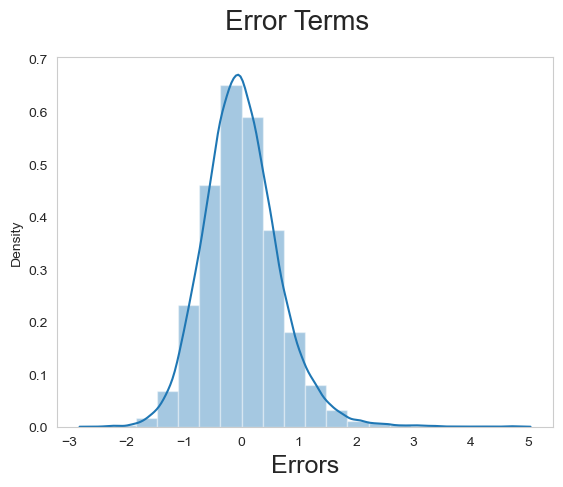

In [255]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

fig = plt.figure()
sns.distplot((y_test- y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()



[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


                          Unscaled Coefficients  Scaled Coefficients
subtotal                               0.268689             0.108018
total_outstanding_orders               0.406482             0.000223
distance                               0.508157             0.311573
market_id_2                           -1.089759            -0.001991
market_id_3                           -0.486683            -0.009187
market_id_4                           -0.853545            -0.097722
market_id_5                           -0.418373            -0.044784
market_id_6                           -0.538456            -0.062059


<Figure size 2000x1000 with 0 Axes>

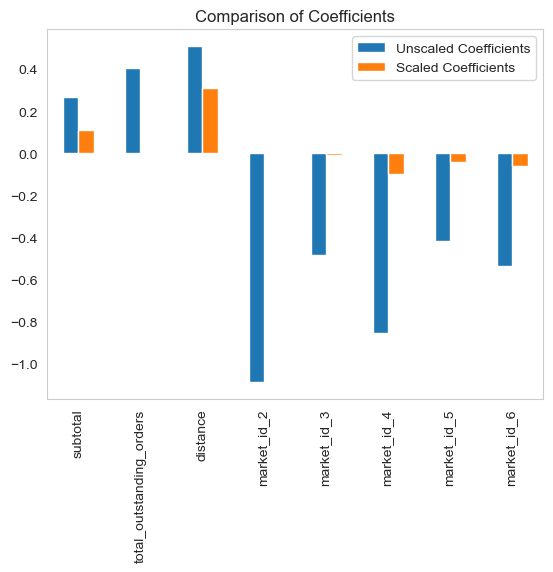

In [263]:
# Compare the scaled vs unscaled features used in the final model

# Unscaled coefficients
unscaled_coefficients = pd.Series(lm.params, index=X_test.columns)

# Scaled coefficients
scaled_coefficients = unscaled_coefficients / scaler.scale_

# Combine both for comparison
comparison = pd.DataFrame({
    'Unscaled Coefficients': unscaled_coefficients,
    'Scaled Coefficients': scaled_coefficients
})

print(comparison)

# Plot the coefficients 
plt.figure(figsize=(20, 10))
comparison.plot(kind='bar')
plt.title('Comparison of Coefficients')
plt.show()



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

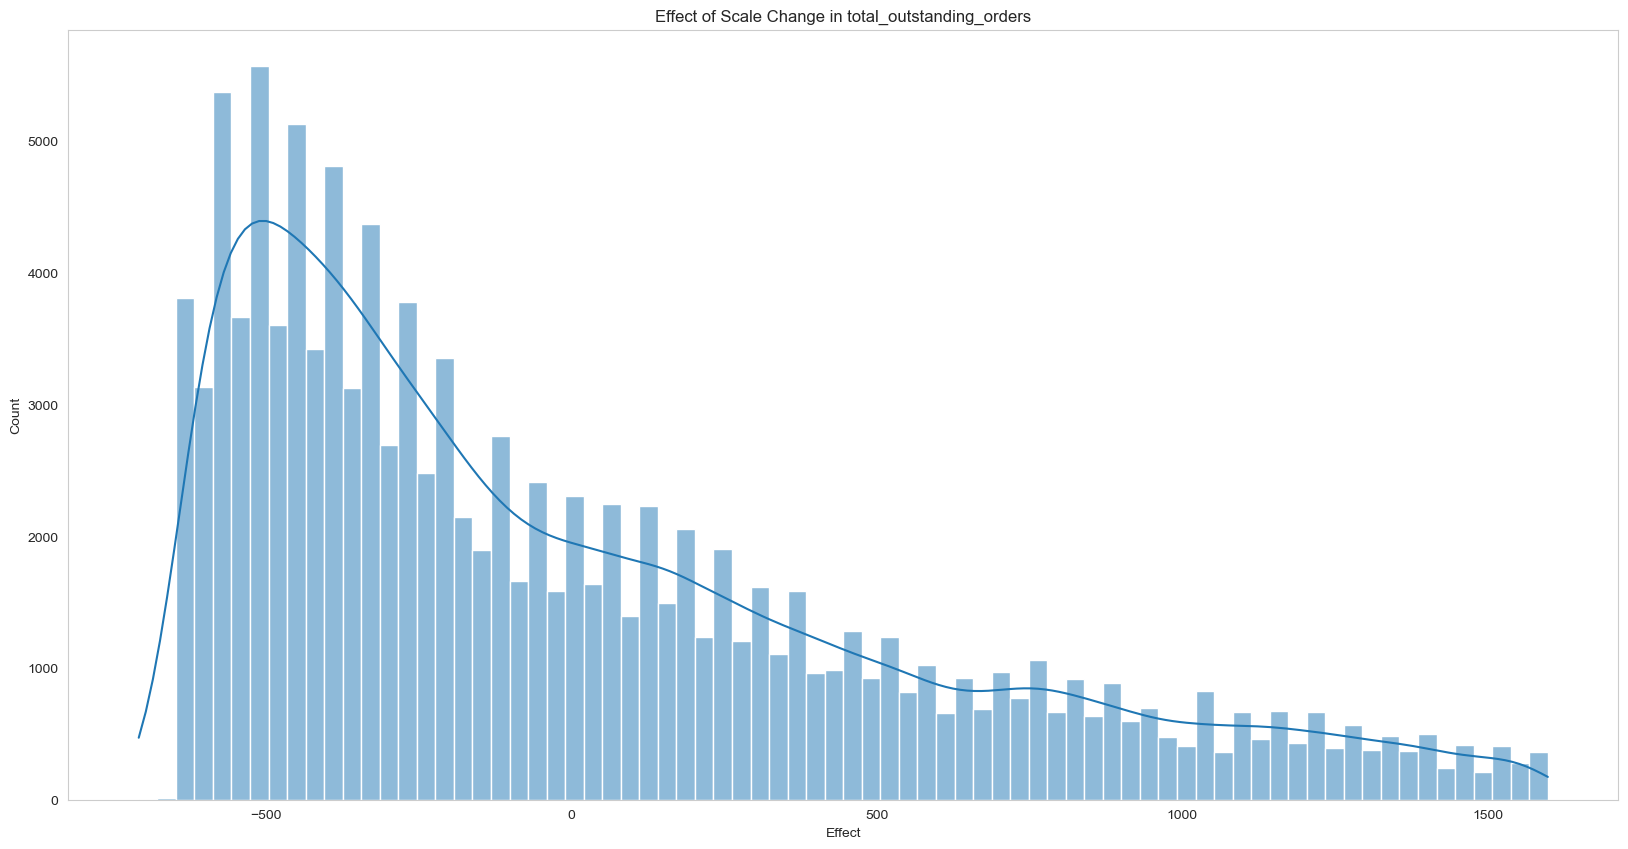

In [265]:
# Analyze the effect of a unit change in a feature, say 'total_items'
# Get the scaled coefficient for 'total_outstanding_orders' as total_itme is removed from the model 

scaled_coefficient = X_train['total_outstanding_orders']

# Rescale the coefficient to interpret it in terms of the original feature
original_scale_effect = scaled_coefficient * scaler.scale_[num_columns.index('total_outstanding_orders')]

original_scale_effect
# Visualise the effect of scale change in the total_outstanding_orders feature 

plt.figure(figsize=(20, 10))
sns.histplot(original_scale_effect, kde=True)
plt.title('Effect of Scale Change in total_outstanding_orders')
plt.xlabel('Effect')
plt.show() 



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
Yes, there are categorical variables in the dataset. The categorical variables are:

market_id
store_primary_category
order_protocol
day_of_week
isWeekend
Inference:
market_id: Different markets may have varying delivery times due to geographical factors, traffic conditions, or operational efficiency. This variable can significantly affect the dependent variable (time_taken).

store_primary_category: The type of store (e.g., restaurant, grocery) can influence delivery time. For example, restaurants may have shorter preparation times compared to grocery stores.

order_protocol: The protocol used for placing orders (e.g., online, phone) might impact the time taken for processing and delivery.

day_of_week: Delivery times may vary across different days of the week due to changes in demand patterns. For instance, weekends might have higher demand, leading to longer delivery times.

isWeekend: This binary variable indicates whether the order was placed on a weekend. Weekends might have higher traffic or demand, potentially increasing delivery times.

These categorical variables were one-hot encoded to make them suitable for regression analysis. Their effects on the dependent variable were analyzed through feature selection techniques like Recursive Feature Elimination (RFE) and Variance Inflation Factor (VIF) analysis.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>


`test_size = 0.2` refers to the proportion of the dataset used for testing the model. In this case, 20% of the data will be used for testing, while the remaining 80% will be used for training the model.


##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>


Looking at the heatmap, the feature `distance` correlates highest with the target variable `time_taken`. The correlation coefficient between `distance` and `time_taken` is 0.45, indicating a moderate positive correlation.


##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

To detect outliers, I used boxplots to visualize the distribution of numerical features and identify potential outliers. I looked for data points that were significantly higher or lower than the rest of the data. To address the outliers, I used the IQR method to filter out data points that were considered outliers based on the IQR range. This method helped in removing extreme values that could affect the model's performance.

##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
Based on the final model, the top 3 features significantly affecting the delivery time are distance, subtotal, and total_outstanding_orders. These features have the highest coefficients in the model, indicating a strong influence on the delivery time.

#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
### Introduction
Linear Regression is a fundamental statistical and machine learning algorithm used for modeling relationships between a dependent variable and one or more independent variables. It is widely used for predictive analysis.

### Types of Linear Regression
1. **Simple Linear Regression**: Models the relationship between one independent variable and one dependent variable.
2. **Multiple Linear Regression**: Models the relationship between multiple independent variables and a dependent variable.


### Assumptions of Linear Regression
1. **Linearity**: The relationship between dependent and independent variables is linear.
2. **Independence**: Observations are independent of each other.
3. **Homoscedasticity**: Constant variance of residuals across all levels of independent variables.
4. **Normality of Errors**: Residuals (errors) should be normally distributed.
5. **No Multicollinearity**: Independent variables should not be highly correlated in multiple linear regression.


### Applications of Linear Regression
- Predicting house prices
- Sales forecasting
- Risk assessment in finance
- Medical research (e.g., predicting disease progression)

### Conclusion
Linear Regression is a powerful yet simple algorithm for predicting continuous outcomes. Understanding its assumptions, cost function, and optimization techniques like gradient descent ensures effective implementation in real-world applications.


##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>


Simple linear regression is a statistical method for summarizing and studying the relationship between two continuous (quantitative) variables. It involves predicting a dependent variable based on a single independent variable. In contrast, multiple linear regression is an extension of simple linear regression that allows us to predict a dependent variable based on multiple independent variables. It involves fitting a linear equation to the data by considering the combined effect of multiple predictors on the target variable.




##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>




 The cost function in linear regression is used to measure the error or the difference between the predicted values and the actual values of the target variable. The goal of linear regression is to minimize this cost function to find the best-fitting line that represents the relationship between the independent and dependent variables. The cost function is minimized using optimization algorithms such as gradient descent, which iteratively adjusts the model parameters to reduce the error and converge to the optimal solution.



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

Overfitting and underfitting are two common problems in machine learning models:

Overfitting occurs when a model learns the training data too well, capturing noise and random fluctuations in the data rather than the underlying patterns. This leads to poor generalization on unseen data and high variance in the model.
Underfitting occurs when a model is too simple to capture the underlying patterns in the data, resulting in high bias and poor performance on both the training and test data.

##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
Residual plots are used to diagnose the goodness of fit of a linear regression model by examining the residuals (the differences between the observed and predicted values). Residual plots help in identifying patterns, trends, or outliers in the residuals, which can indicate issues with the model assumptions or the presence of non-linear relationships in the data. A well-fitted model should have residuals that are randomly distributed around zero, with no clear patterns or trends in the residual plot.